## **Problem Statement:** In This Project our Aim is to enhance the accuracy of detecting fraud in mobile financial transactions. By leveraging machine learning, the project seeks to predict fraudulent transactions with high precision. The goal is to develop a robust machine learning model to accurately identify fraudulent transactions in real-time , enabling the company to improve security, reduce financial losses, and gain insights into factors contributing to transaction fraud.


<h2 align="left">Objectives:</font></h15>

* __Explore the Dataset__: Uncover patterns, distributions, and relationships within the data.
* __Conduct Extensive Exploratory Data Analysis (EDA)__: Dive deep into Different relationships against the target.
* __Preprocessing Steps__:
  - Remove irrelevant features
  - Address missing values
  - Treat outliers
  - Encode categorical variables
  - Transform skewed features to achieve normal-like distributions
* __Model Building__:
  - Establish pipelines for models that require scaling
  - Implement and tune classification models including Logistic Regression, SVM, Decision Trees, and Random Forest
  - Emphasize achieving high recall for class 1, ensuring comprehensive identification of heart patients
* __Evaluate and Compare Model Performance__: Utilize precision, recall, F1-score, and ROC-AUC to gauge models' effectiveness.


### Importing Libraries:

In [1]:
# Lets import the required libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import collections # Imports the collections module which contains specialized data structures
from collections import Counter # Imports the Counter class from the collections module.
                                # Counter is a dict subclass for counting hashable objects

from sklearn.linear_model import LogisticRegression #LogisticRegression Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix,classification_report,roc_curve, auc
from sklearn.model_selection import GridSearchCV #Hyper-parameter tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# Lets Supress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# # mounting the drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Reading the Data
Fraud_data=pd.read_csv("/content/drive/MyDrive/Bia course material/CAPSTONE PROJECT/Fraud_Analysis_Dataset.csv")

## Data Exploration:

In [4]:
# Uderstanding the top 5 rows of fraud data
Fraud_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


In [5]:
# Uderstanding the last 5 rows of fraud data
Fraud_data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
11137,7,DEBIT,6393.71,C1331144930,433084.38,426690.68,C684896216,478421.00,210535.25,0
11138,7,CASH_OUT,298799.54,C932023579,426690.68,127891.14,C1761353343,704355.36,5270364.19,0
11139,7,CASH_OUT,423159.63,C61395726,127891.14,0.00,C1298316171,610479.00,749621.53,0
11140,7,PAYMENT,1094.03,C1224570697,13918.00,12823.97,M983553548,0.00,0.00,0
11141,7,PAYMENT,9235.58,C1637966097,39963.00,30727.42,M609545864,0.00,0.00,0


In [6]:
Fraud_data.sample() #Viewing the sample data of fraud data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
6918,6,PAYMENT,233.28,C110044003,98837.0,98603.72,M939303753,0.0,0.0,0


## Data Information:
* step - maps a unit of time in the real world. In this case 1 step is 1 hour of time.

* type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

* amount - amount of the transaction in local currency.

* nameOrig - customer who started the transaction

* oldbalanceOrg - initial balance before the transaction

* newbalanceOrig - new balance after the transaction.

* nameDest - customer who is the recipient of the transaction

* oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

* newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

* isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

* isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

* CASH-IN: Refers to depositing cash into an account, typically adding funds.

* CASH-OUT: Refers to withdrawing cash from an account, usually removing funds.

* DEBIT: This can have two meanings: It can refer to a decrease in the balance of a financial account due to a withdrawal or an expense.
In accounting, it represents an entry that reduces assets or increases liabilities.

* PAYMENT: Refers to the transfer of money from one party (payer) to another (payee) in exchange for goods, services, or as settlement of a debt.

* TRANSFER: Refers to moving money from one account to another, often between accounts held by the same person or entity.

In [7]:
# Display a concise summary of the dataframe
Fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


<h2 align="left">Inferences:</font></h2>

* __Number of Entries__: The dataset consists of __11142 entries__, ranging from index 0 to 11141.
    
    
* __Data Types__ and __Columns__:This Fraud dataset has __10 columns__ and out of those columns __7 columns__ are __numerical__ and __3 columns__(type,nameOrig,nameDest) are __Categorical__ data type.    
    
* __Missing Values__: In This Dataset there are no missing values as each column has __11142 non-null values__.

In [8]:
# Display the dimensions of the DataFrame
Fraud_data.shape


(11142, 10)

<h2 align="left">Inferences:</font></h2>

In This Fraud dataset we have 11142 Rows and 10 Columns

In [9]:
# summary statics for numerical data
Fraud_data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
step,11142.0,8.717645e+00,1.606748e+01,1.00,2.0000,6.000,7.0000,95.0
amount,11142.0,2.131915e+05,7.600650e+05,2.39,4946.6175,16761.260,154336.5750,10000000.0
oldbalanceOrg,11142.0,9.241173e+05,2.143004e+06,0.00,427.0000,28169.500,304085.4800,19900000.0
newbalanceOrig,11142.0,8.249576e+05,2.089894e+06,0.00,0.0000,4420.605,111412.6350,13000000.0
oldbalanceDest,11142.0,8.883541e+05,2.601376e+06,0.00,0.0000,0.000,271155.4725,33000000.0
newbalanceDest,11142.0,1.103211e+06,2.982447e+06,0.00,0.0000,0.000,318637.3600,34600000.0
isFraud,11142.0,1.024951e-01,3.033119e-01,0.00,0.0000,0.000,0.0000,1.0


<h2 align="left">Inferences:</font></h2>

 * __Step:__ The "step" variable, representing time, spans from a minimum of 1 to a maximum of 14 with an average of around 8.7. This suggests that the dataset covers transactions over approximately 14 hours, with most transactions occurring around the 8th or 9th hour.

 * __Amount:__ The transaction amounts vary significantly, ranging from a minimum of 0 to a maximum of over 10 million. The average transaction amount is around 213191.5, but the standard deviation of 760065 indicates a wide spread of values, suggesting a mix of small and very large transactions.

 * __Balances:__ Both the origin ("oldbalanceOrg," "newbalanceOrig") and destination ("oldbalanceDest," "newbalanceDest") accounts show a similar pattern: a minimum of 0, very high maximum values (in the billions), and large standard deviations. This suggests a diverse range of account balances, with some accounts holding substantial amounts.

 * __Fraudulent Transactions:__ The "isFraud" column, indicating fraudulent transactions, has a mean close to 0. This implies that fraudulent transactions are relatively rare within the dataset.


In [10]:
# Identifying the null/missing values in our dataset
Fraud_data.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


<h2 align="left"><font size = "">Inferences:</font></h2>
 <font size = '4'>In This Dataset there are no missing values.</font>

In [11]:
#  Check if all values in any column are null
Fraud_data.isnull().all(axis=0).any()


False

In [12]:
# checking any unique values in the dataset
Fraud_data.nunique().value_counts()


,count
95,1
5,1
10565,1
11142,1
7806,1
5914,1
7508,1
4531,1
2030,1
2,1


In [13]:
# Checking the duplicate values in the dataset
Fraud_data.duplicated().sum()

0

In [14]:
# Identifying the categorical and numerical columns
categorical_col = Fraud_data.select_dtypes(include=['object']).columns
numerical_col = Fraud_data.select_dtypes(exclude=['object']).columns

print("Categorical columns : ",categorical_col)
print("Numerical columns : ",numerical_col)


Categorical columns :  Index(['type', 'nameOrig', 'nameDest'], dtype='object')
Numerical columns :  Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')


In [15]:
# Checking the correlation between those numrical columns
Fraud_data[numerical_col].corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.421846,0.056078,-0.110430,-0.043655,0.006122,0.831961
amount,0.421846,1.000000,0.323943,-0.007816,0.094117,0.227413,0.435490
oldbalanceOrg,0.056078,0.323943,1.000000,0.937024,0.207628,0.209787,0.046445
newbalanceOrig,-0.110430,-0.007816,0.937024,1.000000,0.234148,0.190314,-0.127912
oldbalanceDest,-0.043655,0.094117,0.207628,0.234148,1.000000,0.928831,-0.056575
newbalanceDest,0.006122,0.227413,0.209787,0.190314,0.928831,1.000000,-0.002864
isFraud,0.831961,0.435490,0.046445,-0.127912,-0.056575,-0.002864,1.000000


<h2 align="left">Inferences from the correlation analysis::</font></h2>

##Strong Positive Correlations:

- **oldbalanceOrg and newbalanceOrig:** A very strong positive correlation (0.937) indicates that the original balance before and after a transaction are closely linked. This is expected as most transactions wouldn't drastically alter the overall balance.

- **oldbalanceDest and newbalanceDest:** Similarly, a strong positive correlation (0.928) exists between the destination account's balance before and after a transaction, suggesting a similar pattern.

## Moderate Positive Correlations:

- **amount and newbalanceDest:** A moderate positive correlation (0.227) suggests that larger transaction amounts tend to result in higher ending balances in the destination account. This makes sense as more money transferred would increase the recipient's balance.

## Weak or No Correlations:

- **Other pairs:** Most other pairs of variables show weak or negligible correlations. This suggests that factors like 'step' (time), 'isFraud' don't have a strong linear relationship with the account balances or transaction amounts.


## Exploratory Data Analysis:

### 1. Univariate Analysis:

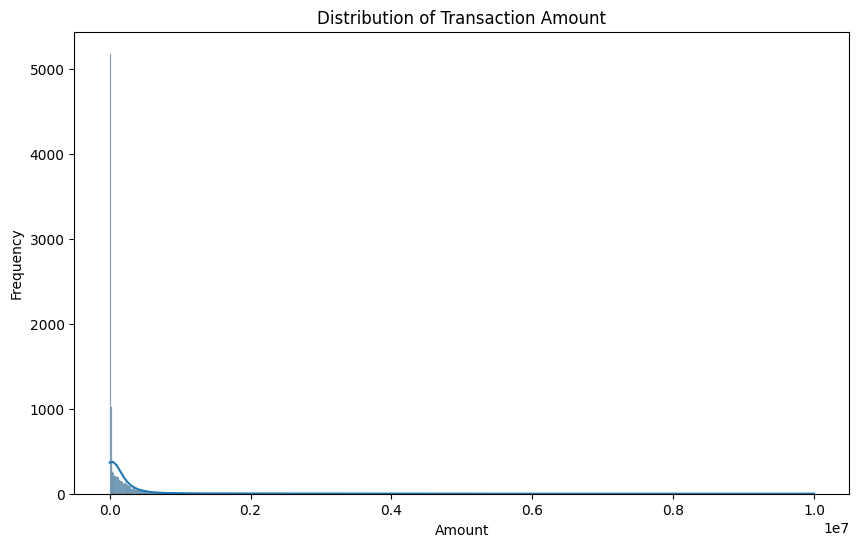

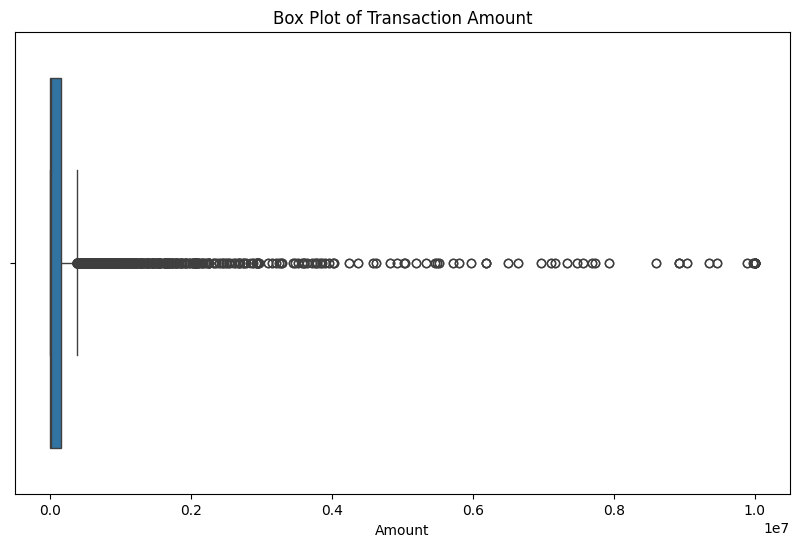

In [16]:
# @title Univariate analysis of 'amount'

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(Fraud_data['amount'], kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=Fraud_data['amount'])
plt.title('Box Plot of Transaction Amount')
plt.xlabel('Amount')
plt.show()



<h2 align="left">Inferences:</font></h2>

1.  The 'amount' variable shows a highly skewed distribution with a long tail to the right. So This indicates the presence of some extremely large transactions compared to the majority.
2.  The box plot confirms the presence of many outliers, suggesting potential need for handling them during modeling.

In [17]:
Fraud_data['isFraud'].value_counts()

,count
isFraud,
0,10000
1,1142


In [18]:
# lets find out churn/non churn percentage of Fraud Transaction
Fraud_data['isFraud'].value_counts()/len(Fraud_data)*100

,count
isFraud,
0,89.750494
1,10.249506


 <h2 align="left">Inferences:</font></h2>


 1. The data shows a significant imbalance between fraudulent and non-fraudulent transactions.
 2. Only a small percentage of transactions are flagged as fraudulent (approximately 10.25% of the total).
 3. This imbalance highlights the need for techniques to handle class imbalance during model training to prevent bias towards the majority class (non-fraudulent transactions).


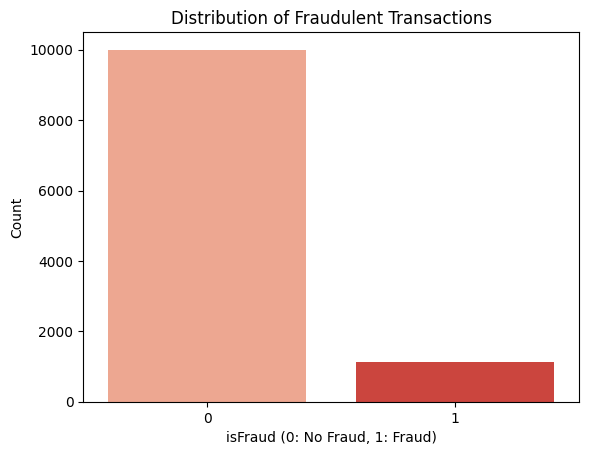

Number of Non-Fraudulent Transactions: 10000
Number of Fraudulent Transactions: 1142


In [19]:
# @title Univariate Analysis of isFraud column
sns.countplot(x='isFraud', data=Fraud_data,palette="Reds")
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('isFraud (0: No Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()

fraud_counts = Fraud_data['isFraud'].value_counts()
print("Number of Non-Fraudulent Transactions:", fraud_counts[0])
print("Number of Fraudulent Transactions:", fraud_counts[1])


<h2 align="left">Inferences:</font></h2>

1.  The dataset is highly imbalanced with a significantly larger number of non-fraudulent transactions compared to fraudulent ones.


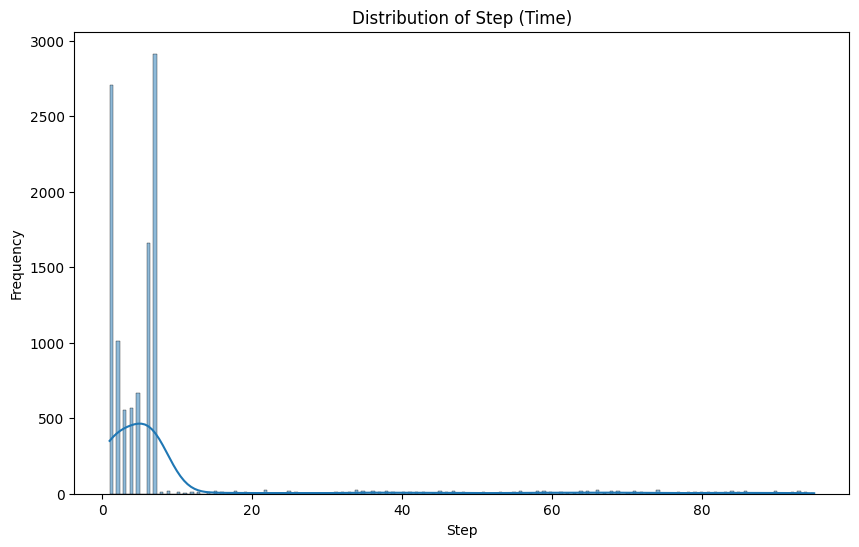

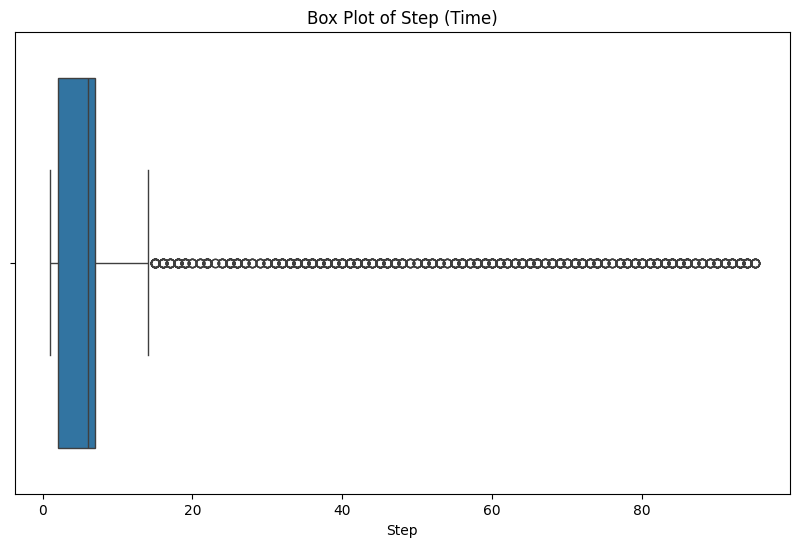

In [20]:
# @title Univariate Analysis of 'step'

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(Fraud_data['step'], kde=True)
plt.title('Distribution of Step (Time)')
plt.xlabel('Step')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=Fraud_data['step'])
plt.title('Box Plot of Step (Time)')
plt.xlabel('Step')
plt.show()

 <h2 align="left">Inferences:</font></h2>

 1. The distribution of 'step' appears to be somewhat uniform, suggesting transactions are spread relatively evenly across the time period covered.
 2. There are no significant outliers in the 'step' variable.

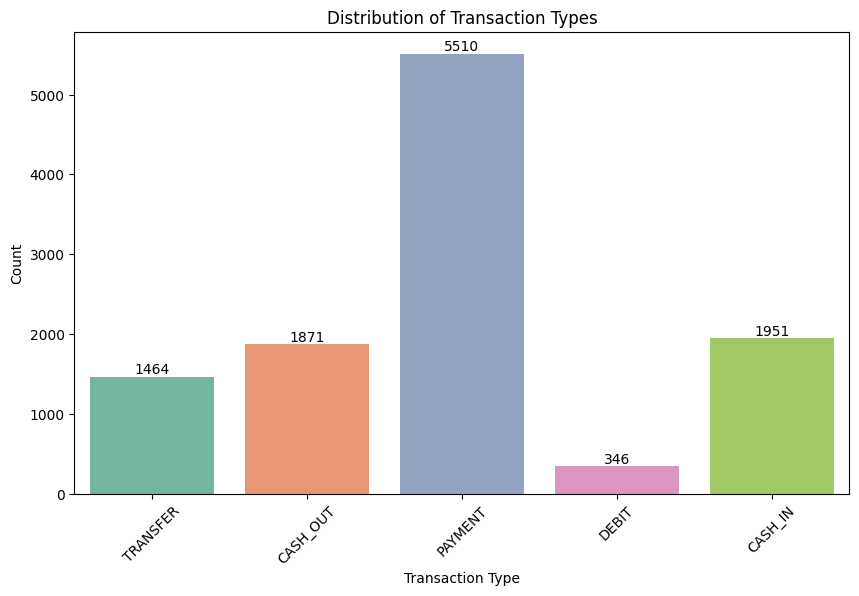

In [21]:
# @title Univariate Analysis of 'type'

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='type', data=Fraud_data, palette="Set2")
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container)

plt.show()

<h2 align="left">Inferences:</font></h2>

1. "CASH_OUT" and "PAYMENT" are the most frequent transaction types, indicating a higher volume of cash withdrawals and payments compared to other types.
2. "CASH_IN" transactions are relatively less common, suggesting fewer instances of depositing cash into accounts.
3. "TRANSFER" and "DEBIT" transactions occur with moderate frequency, indicating a balanced usage of these transaction types.

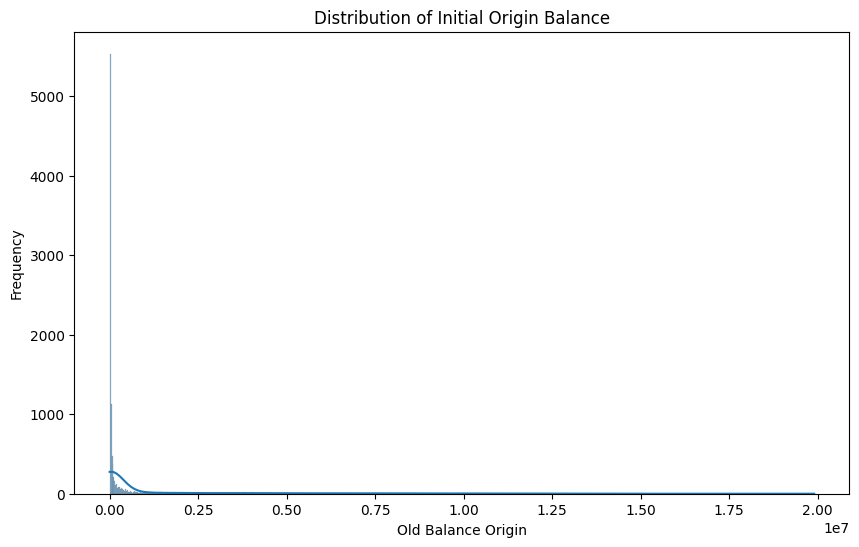

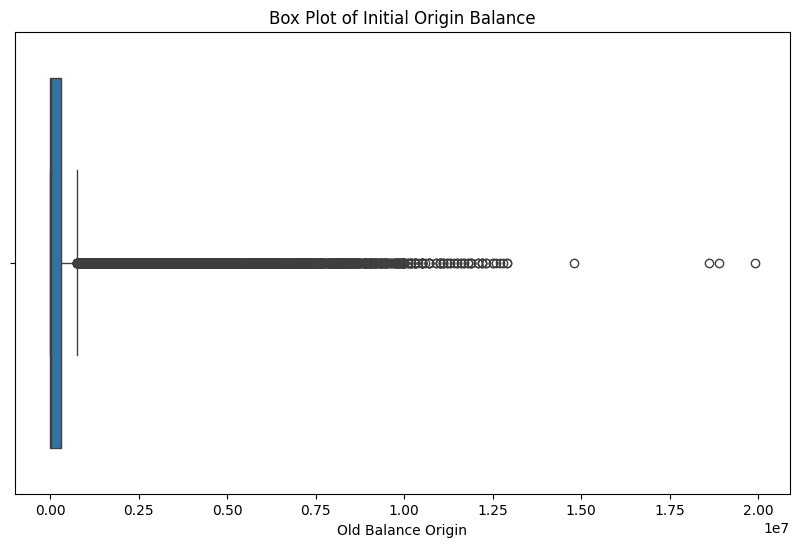

In [22]:
# @title Univariate Analysis of 'oldbalanceOrg'

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(Fraud_data['oldbalanceOrg'], kde=True)
plt.title('Distribution of Initial Origin Balance')
plt.xlabel('Old Balance Origin')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=Fraud_data['oldbalanceOrg'])
plt.title('Box Plot of Initial Origin Balance')
plt.xlabel('Old Balance Origin')
plt.show()

<h2 align="left">Inferences:</font></h2>

 1. The 'oldbalanceOrg' is heavily right-skewed, indicating a large number of accounts with low initial balances and a few with extremely high balances.
 2. Numerous outliers are present, suggesting potential need for addressing extreme values.

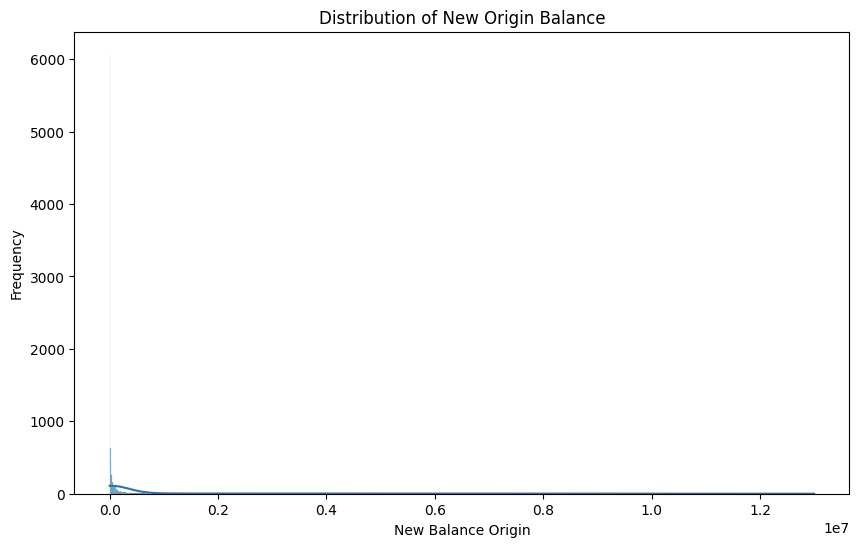

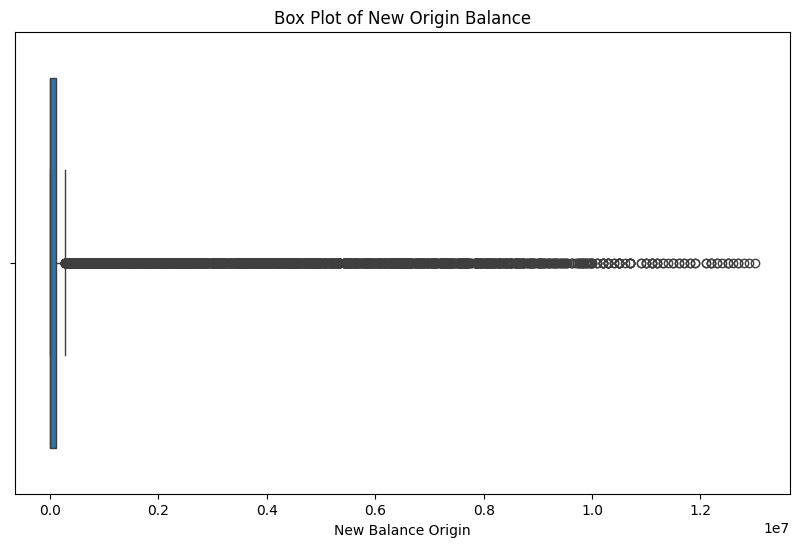

In [23]:
# @title Univariate Analysis of 'newbalanceOrig'

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(Fraud_data['newbalanceOrig'], kde=True)
plt.title('Distribution of New Origin Balance')
plt.xlabel('New Balance Origin')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=Fraud_data['newbalanceOrig'])
plt.title('Box Plot of New Origin Balance')
plt.xlabel('New Balance Origin')
plt.show()

<h2 align="left">Inferences:</font></h2>

 1. Similar to 'oldbalanceOrg', the 'newbalanceOrig' also exhibits a right-skewed distribution with a long tail.
 2. Outliers are present, indicating a need for handling extreme values.

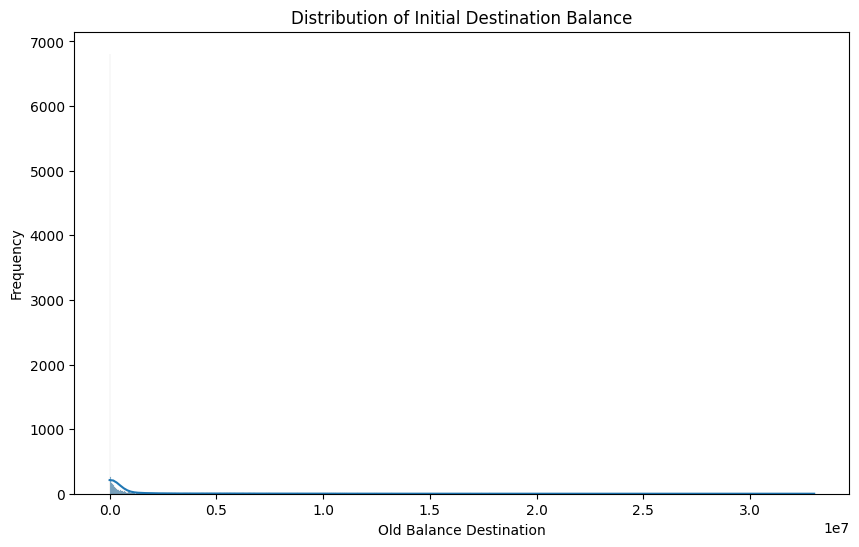

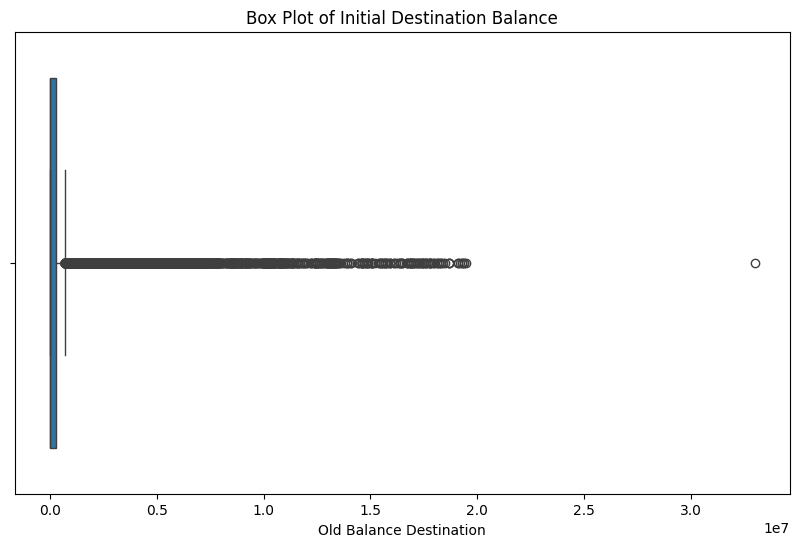

In [24]:
# @title Univariate Analysis of 'oldbalanceDest'

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(Fraud_data['oldbalanceDest'], kde=True)
plt.title('Distribution of Initial Destination Balance')
plt.xlabel('Old Balance Destination')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=Fraud_data['oldbalanceDest'])
plt.title('Box Plot of Initial Destination Balance')
plt.xlabel('Old Balance Destination')
plt.show()


<h2 align="left">Inferences:</font></h2>

 1. 'oldbalanceDest' shows a right-skewed distribution with a concentration of lower balances and a few very high balances.
 2. Outliers are present, suggesting potential need for addressing extreme values.

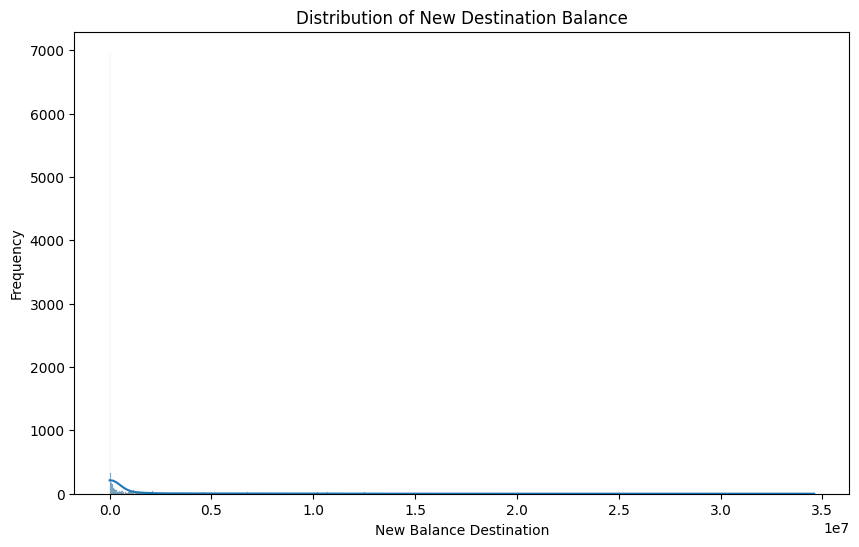

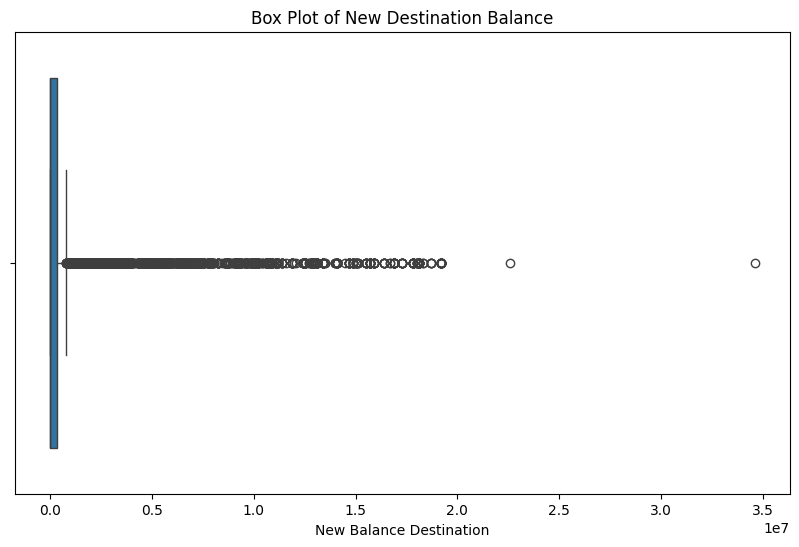

In [25]:
# @title Univariate Analysis of 'newbalanceDest'

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(Fraud_data['newbalanceDest'], kde=True)
plt.title('Distribution of New Destination Balance')
plt.xlabel('New Balance Destination')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=Fraud_data['newbalanceDest'])
plt.title('Box Plot of New Destination Balance')
plt.xlabel('New Balance Destination')
plt.show()

<h2 align="left">Inferences:</font></h2>

 1. The distribution of 'newbalanceDest' is right-skewed, indicating a large number of accounts with lower ending balances and a few with very high balances.
 2. Outliers are present, suggesting a need for handling extreme values.

## Bivariate Analysis:

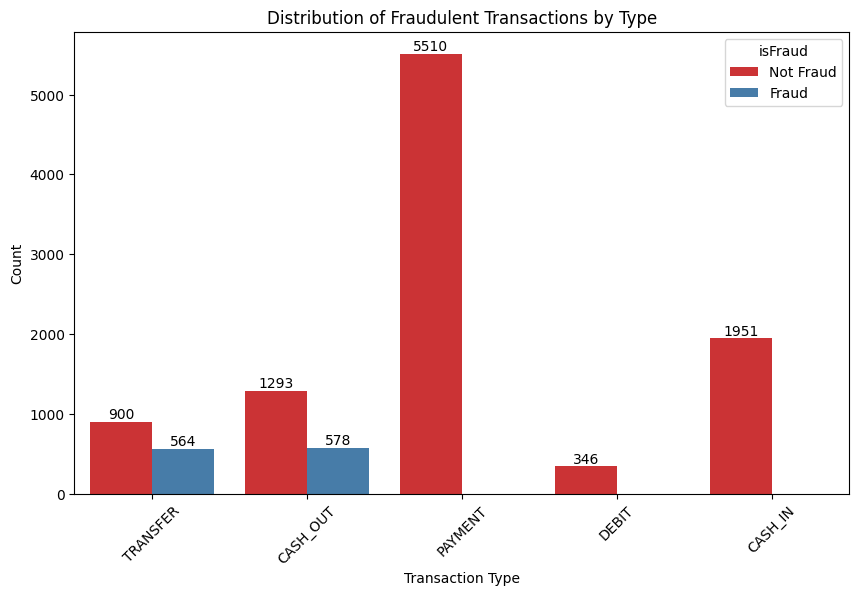

In [26]:
# @title Bivariate Analysis of 'type' and 'isFraud'

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='type', hue='isFraud', data=Fraud_data, palette="Set1")
plt.title('Distribution of Fraudulent Transactions by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='isFraud', labels=['Not Fraud', 'Fraud'])

for container in ax.containers:
    ax.bar_label(container)

plt.show()

 <h2 align="left">Inferences:</font></h2>

 1. Fraudulent transactions are primarily concentrated in "CASH_OUT" and "TRANSFER" types. This suggests that fraudsters tend to favor these methods for illicit activities.
 2. No fraudulent transactions are observed in "CASH_IN," "DEBIT," or "PAYMENT" types. This indicates that these transaction types might be less susceptible to fraudulent behavior.


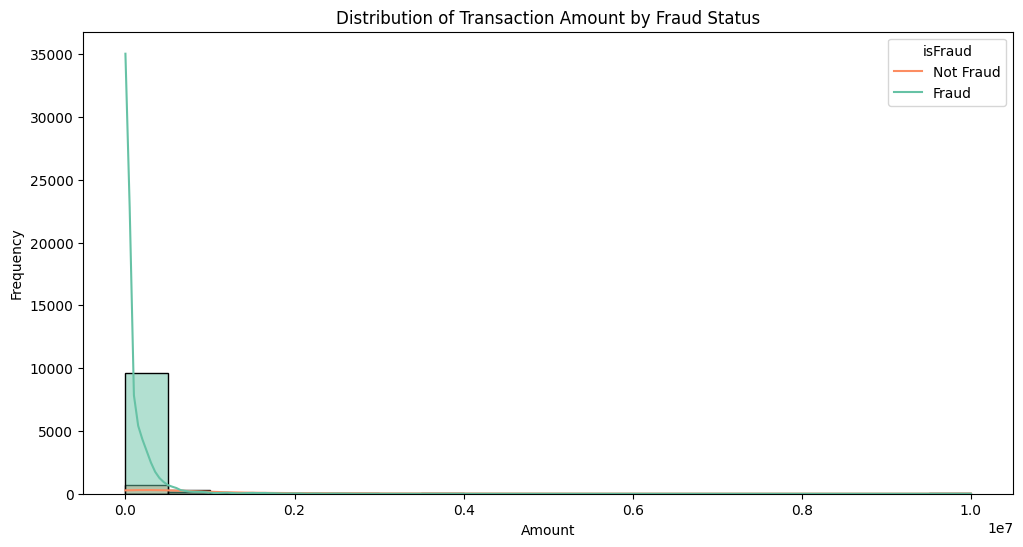

In [27]:
# @title Bivariate Analysis of 'amount' and 'isFraud'
plt.figure(figsize=(12, 6))
ax = sns.histplot(x='amount', hue='isFraud', data=Fraud_data, bins=20, kde=True, palette="Set2")
plt.title('Distribution of Transaction Amount by Fraud Status')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend(title='isFraud', labels=['Not Fraud', 'Fraud'])

plt.show()

<h2 align="left">Inferences:</font></h2>

 1. Fraudulent transactions tend to involve larger amounts compared to non-fraudulent ones. The distribution for fraudulent transactions is shifted towards higher amounts.
 2. However, there's also a significant overlap in the amount distributions for both fraudulent and non-fraudulent transactions. This implies that relying solely on the transaction amount might not be sufficient to accurately distinguish between them.


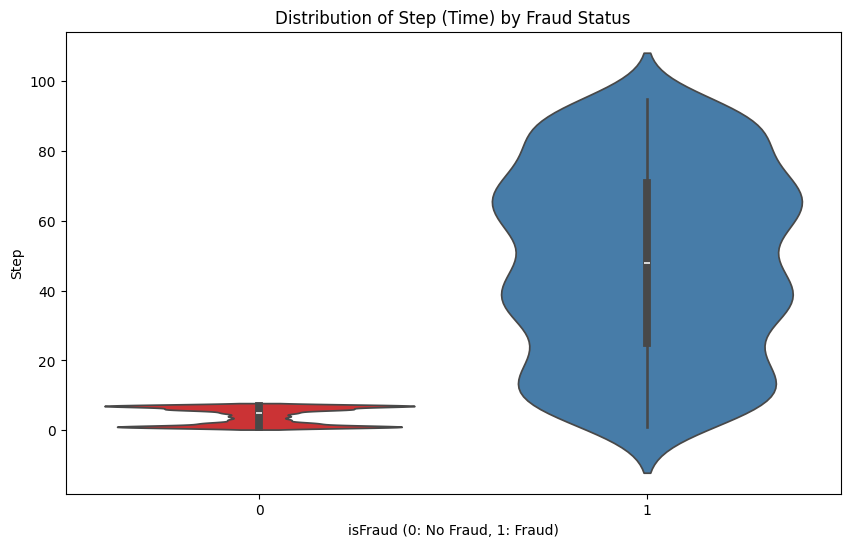

In [28]:
# @title Bivariate Analysis of 'step' and 'isFraud'
plt.figure(figsize=(10, 6))
sns.violinplot(x='isFraud', y='step', data=Fraud_data, palette="Set1")
plt.title('Distribution of Step (Time) by Fraud Status')
plt.xlabel('isFraud (0: No Fraud, 1: Fraud)')
plt.ylabel('Step')
plt.show()

<h2 align="left">Inferences:</font></h2>

 1. The distribution of 'step' (time) for fraudulent transactions appears to be slightly wider and more spread out compared to non-fraudulent transactions.
 2. This suggests that fraudulent activities might occur across a broader range of time periods, while non-fraudulent transactions might be more concentrated within specific timeframes.


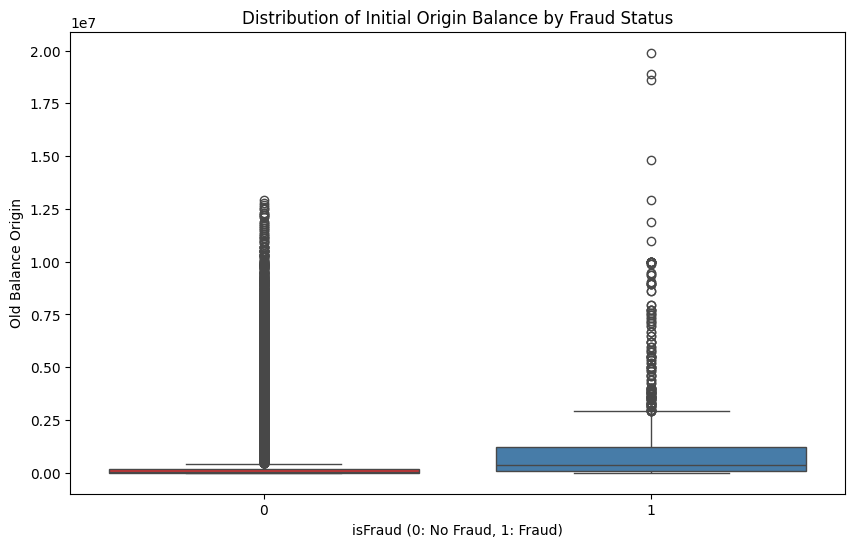

In [29]:
# @title Bivariate Analysis of 'oldbalanceOrg' and 'isFraud'
plt.figure(figsize=(10, 6))
sns.boxplot(x='isFraud', y='oldbalanceOrg', data=Fraud_data, palette="Set1")
plt.title('Distribution of Initial Origin Balance by Fraud Status')
plt.xlabel('isFraud (0: No Fraud, 1: Fraud)')
plt.ylabel('Old Balance Origin')
plt.show()

<h2 align="left">Inferences:</font></h2>

 1. Fraudulent transactions tend to originate from accounts with higher initial balances compared to non-fraudulent transactions. The median 'oldbalanceOrg' for fraudulent transactions is noticeably higher.
 2. There's a wider range of initial balances for fraudulent transactions, indicating that fraudsters might target accounts with varying balances.



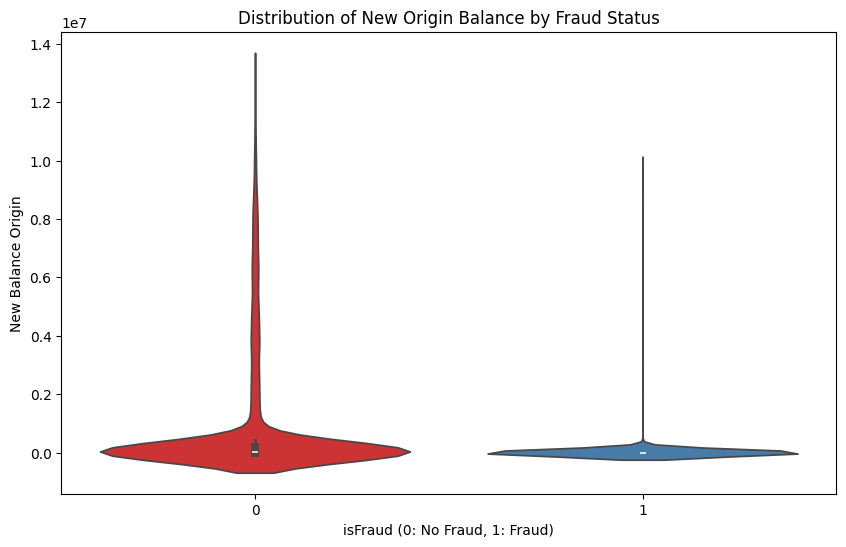

In [30]:
# @title Bivariate Analysis of 'newbalanceOrig' and 'isFraud'
plt.figure(figsize=(10, 6))
sns.violinplot(x='isFraud', y='newbalanceOrig', data=Fraud_data, palette="Set1")
plt.title('Distribution of New Origin Balance by Fraud Status')
plt.xlabel('isFraud (0: No Fraud, 1: Fraud)')
plt.ylabel('New Balance Origin')
plt.show()

<h2 align="left">Inferences:</font></h2>

 1. After a fraudulent transaction, the origin account's balance ('newbalanceOrig') tends to be significantly lower compared to non-fraudulent transactions. The median 'newbalanceOrig' for fraudulent transactions is much closer to zero.
 2. This suggests that fraudsters often try to deplete the origin account's funds as part of their illicit activities.

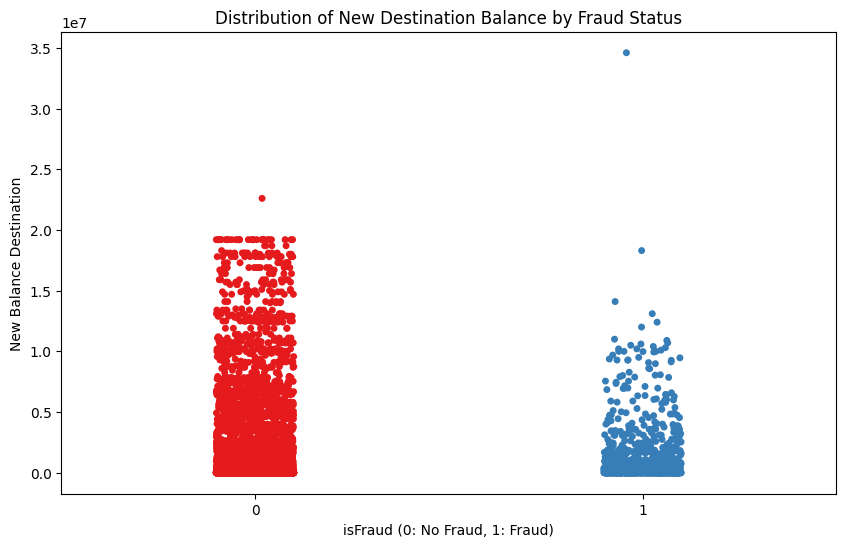

In [31]:
# @title Bivariate Analysis of 'newbalanceDest' and 'isFraud'
plt.figure(figsize=(10, 6))
sns.stripplot(x='isFraud', y='newbalanceDest', data=Fraud_data, palette="Set1")
plt.title('Distribution of New Destination Balance by Fraud Status')
plt.xlabel('isFraud (0: No Fraud, 1: Fraud)')
plt.ylabel('New Balance Destination')
plt.show()

<h2 align="left">Inferences:</font></h2>

 1. There's a noticeable difference in the distribution of 'newbalanceDest' (new destination balance) between fraudulent and non-fraudulent transactions.
 2. For fraudulent transactions, the new destination balances are more concentrated towards lower values, with a significant number of transactions resulting in a near-zero balance in the destination account.
 3. In contrast, non-fraudulent transactions exhibit a wider range of new destination balances, including many higher values.
 4. This suggests that fraudulent transactions often aim to transfer funds to accounts that were initially empty or had low balances, possibly to avoid detection or quickly move the stolen money.


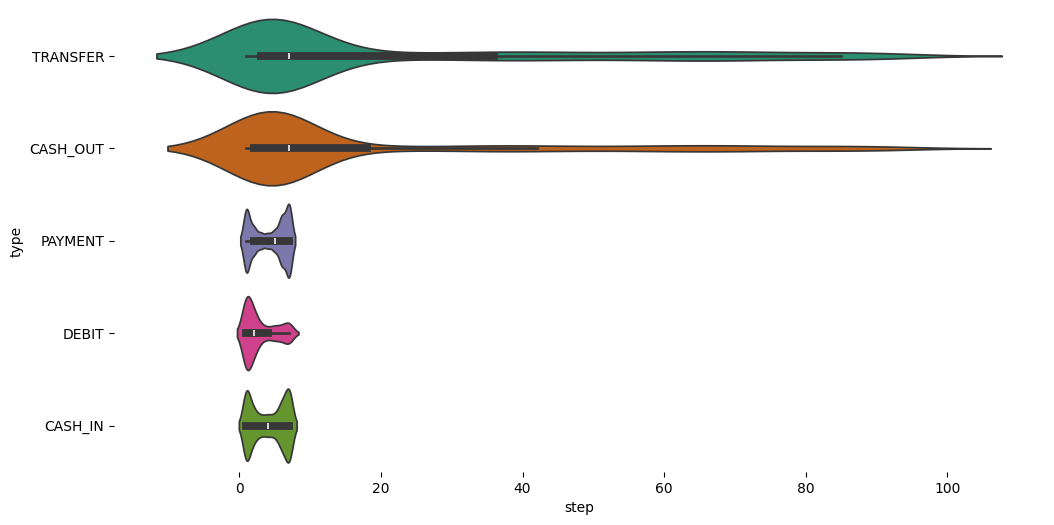

In [32]:
# @title Bivariate Analysis Between type vs step

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(Fraud_data['type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(Fraud_data, x='step', y='type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<h2 align="left">Inferences:</font></h2>

 1. **Distribution of Transactions Over Time:**  The violin plot reveals how different transaction types are distributed across the 'step' (time) variable.
 2. **Variability in Timing:** Some transaction types show more variability in their timing, while others appear more concentrated within specific time periods.
 3. **Potential Patterns:**  This visualization could help identify if certain transaction types are more likely to occur at specific times, which could be relevant for fraud detection or understanding transaction patterns.


# Multivariate Analysis:

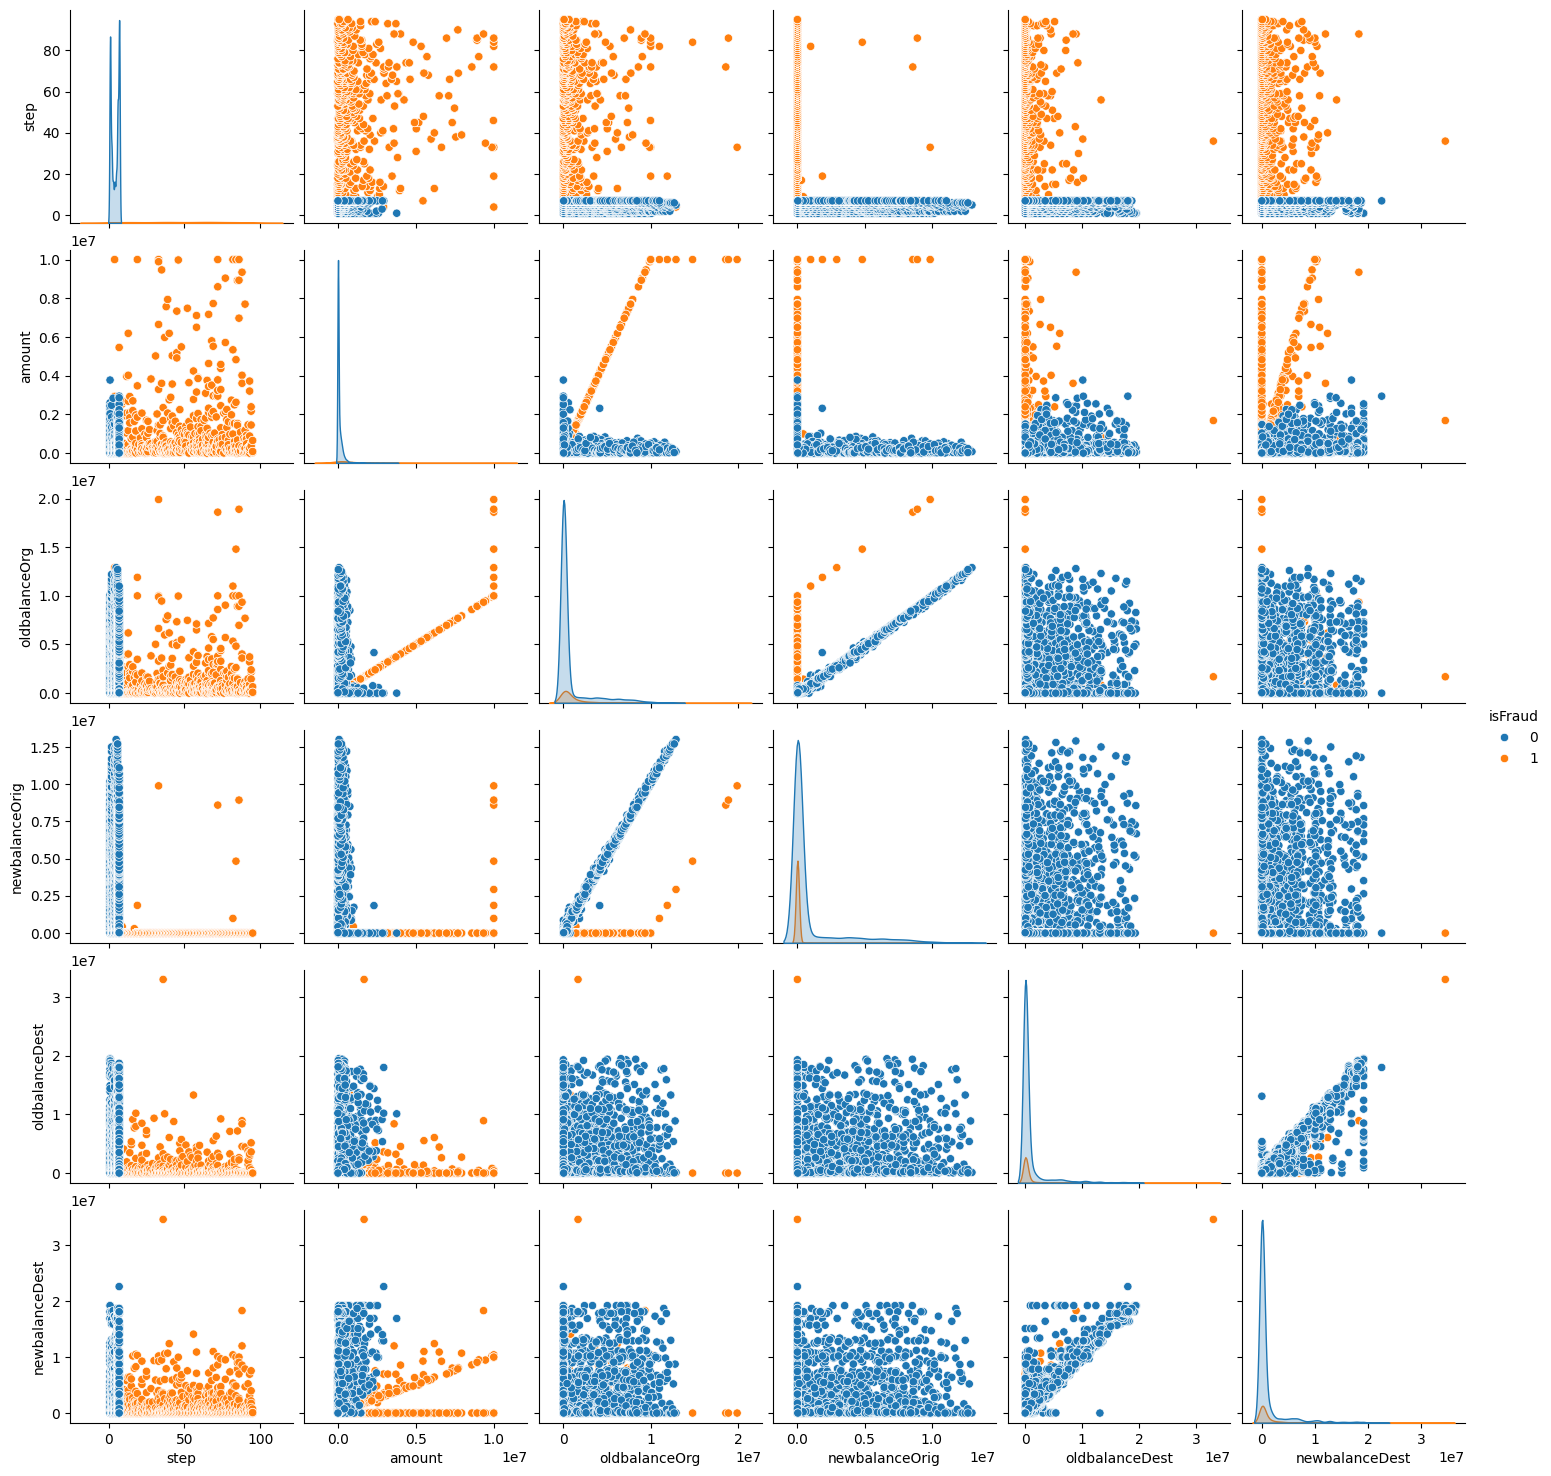

In [33]:
# Understanding through pair plot
sns.pairplot(Fraud_data, hue='isFraud', vars=['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], diag_kind='kde')
plt.show()


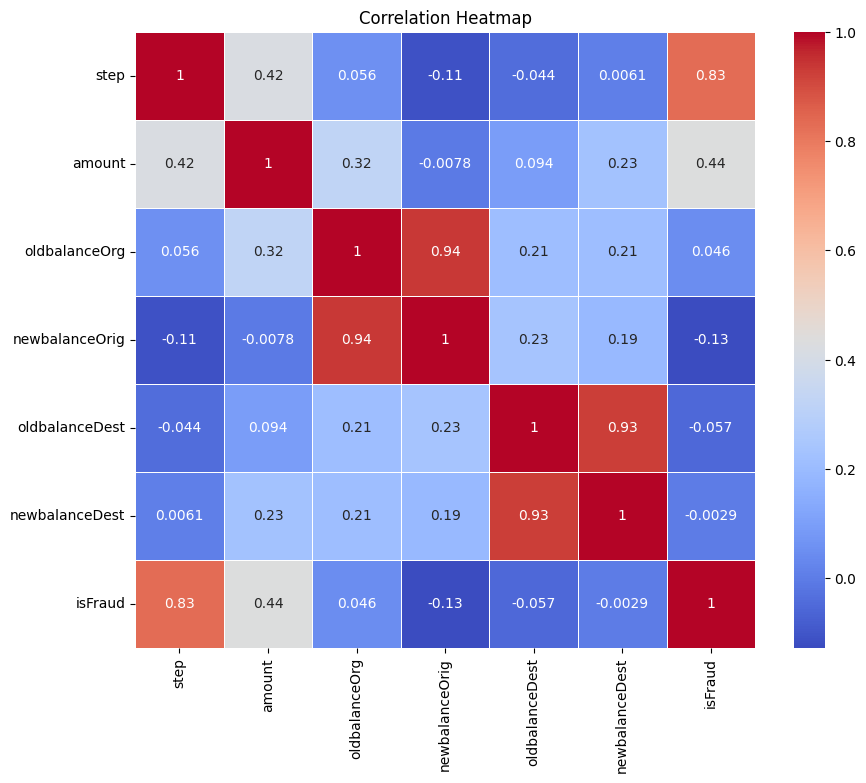

In [34]:
# Calculate the correlation matrix
corr_data = Fraud_data.corr(numeric_only=True) # add numeric_only=True

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

<h2 align="left">Inferences from the Heatmap correlation analysis::</font></h2>

## Strong Positive Correlations:

## - **oldbalanceOrg and newbalanceOrig:** A very strong positive correlation (0.94) indicates that the original balance before and after a transaction are closely linked. This is expected as most transactions wouldn't drastically alter the overall balance.

## - **oldbalanceDest and newbalanceDest:** Similarly, a strong positive correlation (0.93) exists between the destination account's balance before and after a transaction, suggesting a similar pattern.

### Moderate Positive Correlations:

## - **amount and newbalanceDest:** A moderate positive correlation (0.23) suggests that larger transaction amounts tend to result in higher ending balances in the destination account. This makes sense as more money transferred would increase the recipient's balance.

### Weak or No Correlations:

## - **Other pairs:** Most other pairs of variables show weak or negligible correlations. This suggests that other factors don't have a strong linear relationship with the account balances or transaction amounts.


## Insights useful for business or modelling/feature engineering:

In [35]:
# Storing Fraud and non-Fraud transactions

# Store Fraudulent Transactions
df_fraud = Fraud_data[Fraud_data['isFraud'] == 1]

# Store Non-Fraudulent Transactions
df_nonfraud = Fraud_data[Fraud_data['isFraud'] == 0]


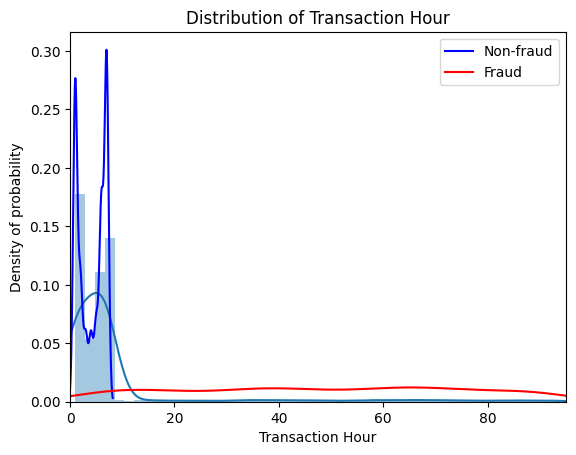

In [36]:
# @title 1.Hourly based Fraud Transactions
# Time Distribution plot for transactions

# plt.figure(figsize=(15,7))

plt.title('Distribution of Transaction Hour')
sns.distplot(Fraud_data['step'])

target_0 = Fraud_data.loc[Fraud_data['isFraud'] == 0]
target_1 = Fraud_data.loc[Fraud_data['isFraud'] == 1]
ax1=sns.distplot(target_0[['step']], hist=False, color='b', label='Non-fraud')
ax2=sns.distplot(target_1[['step']], hist=False, color='r', label='Fraud')
ax1.set_xlim(0, max(Fraud_data[Fraud_data['isFraud']==1]['step']))
ax2.set_xlim(0, max(Fraud_data[Fraud_data['isFraud']==1]['step']))
plt.legend()
plt.xlabel('Transaction Hour')
plt.ylabel('Density of probability')
plt.show()

 <h2 align="left">Inferences:</font></h2>

 1. **Fraudulent Transactions Occur at Specific Times:** The plot reveals that fraudulent transactions tend to cluster in certain time periods. This suggests potential patterns in fraudulent activity that could be exploited for detection.

 2. **Time-Based Patterns:**  Analyzing the distribution of fraudulent transactions over time can help identify specific hours or days when fraud is more prevalent. This information can be crucial for implementing targeted security measures.

 3. **Comparison with Non-Fraudulent Transactions:** By comparing the distribution of fraudulent transactions with non-fraudulent ones, we can identify significant differences in their timing patterns. This can aid in developing more effective fraud detection algorithms.


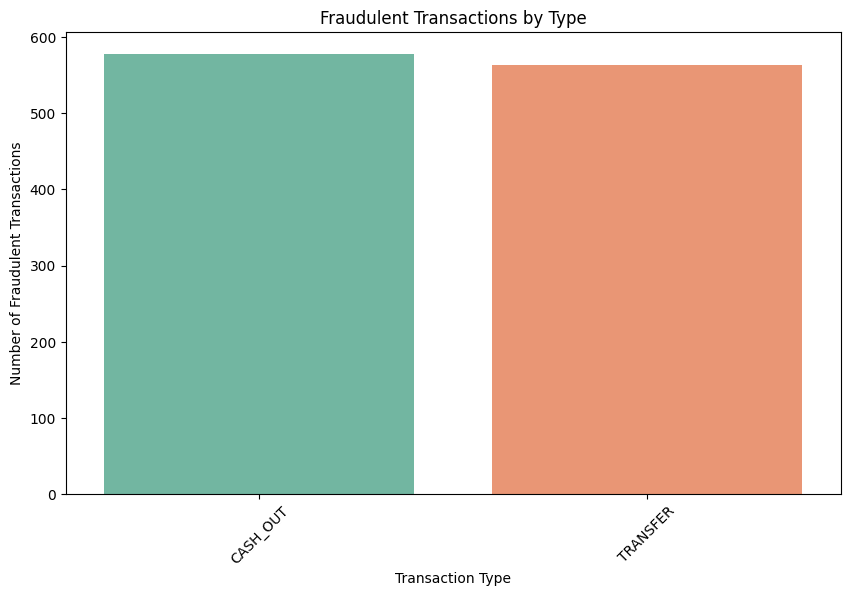

In [37]:
#  @title 2.insightful analysis on Fraud Transactions in categories

# Group fraudulent transactions by transaction type and count occurrences
fraud_by_type = df_fraud.groupby('type')['isFraud'].count()

# Plot the distribution of fraudulent transactions by type
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_by_type.index, y=fraud_by_type.values, palette="Set2")
plt.title('Fraudulent Transactions by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.show()

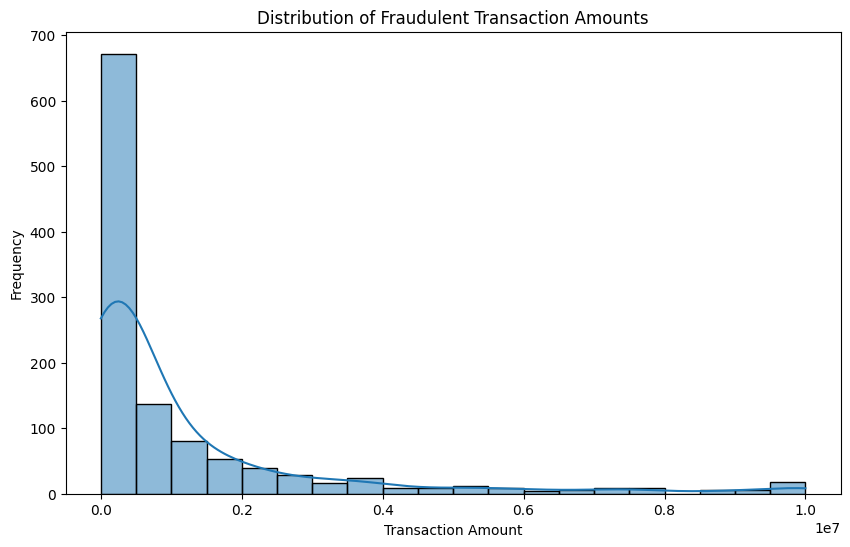

In [38]:
# Analyze the distribution of fraudulent transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(df_fraud['amount'], kde=True, bins=20)
plt.title('Distribution of Fraudulent Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

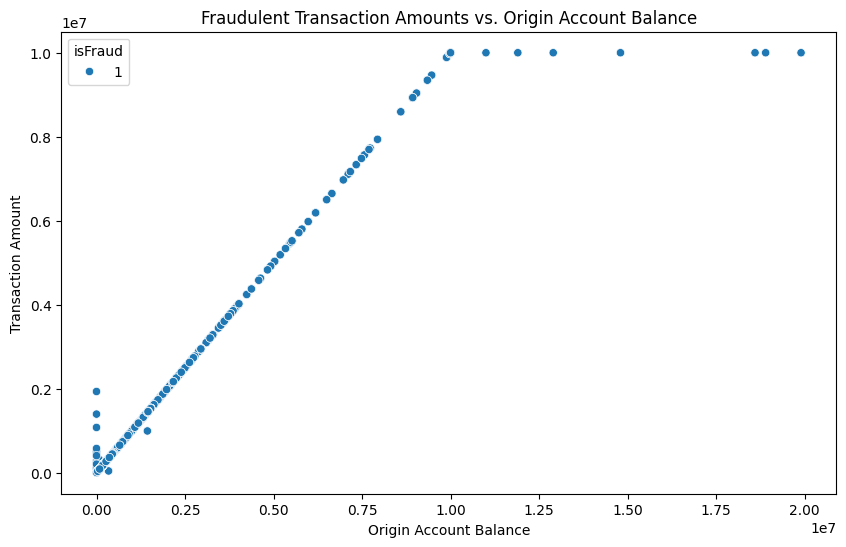

In [39]:
# Analyze the relationship between fraudulent transaction amounts and origin account balance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='oldbalanceOrg', y='amount', data=df_fraud, hue='isFraud')
plt.title('Fraudulent Transaction Amounts vs. Origin Account Balance')
plt.xlabel('Origin Account Balance')
plt.ylabel('Transaction Amount')
plt.show()

 <h2 align="left">Inferences:</font></h2>

 1. **Relationship between Transaction Amount and Origin Balance:** The scatter plot shows a general trend where larger transaction amounts tend to be associated with higher origin account balances. This is expected as accounts with larger balances are more likely to be targeted for fraudulent transactions.

 2. **Variability:** While there's a general trend, there's also significant variability in the data. Some transactions with high origin balances have relatively low amounts, and vice versa. This suggests that other factors beyond the origin account balance contribute to the transaction amount in fraudulent cases.

 3. **Potential Outliers:** There might be a few outliers in the plot, indicating transactions with unusually high amounts compared to their origin account balance. These outliers could be interesting to investigate further to understand potential fraud patterns.



In [40]:
# @title 3.insightful analysis on Fraud Transactions in merchant(top 20) only for 3 important columns

# Filter for 'CASH_OUT' transactions
cash_out_transactions = Fraud_data[Fraud_data['type'] == 'CASH_OUT']

# Group by 'nameDest' and count the number of transactions
top_merchants = cash_out_transactions.groupby('nameDest')['isFraud'].count().sort_values(ascending=False).head(20)

# Get the names of the top 20 merchants
top_merchant_names = top_merchants.index

# Filter the data to include only transactions from the top 20 merchants
top_merchant_data = cash_out_transactions[cash_out_transactions['nameDest'].isin(top_merchant_names)]

In [41]:
# Selecting the 3 important columns
selected_columns = ['nameDest', 'amount', 'isFraud']
top_merchant_data = top_merchant_data[selected_columns]

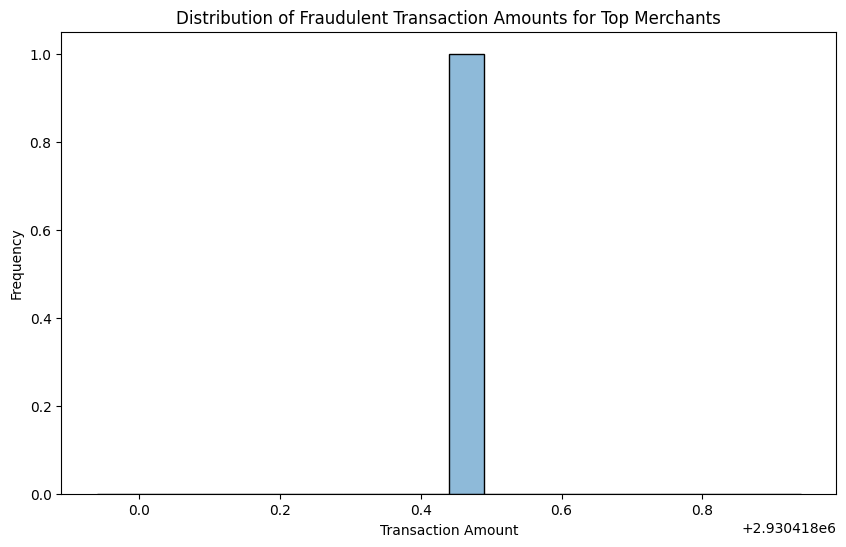

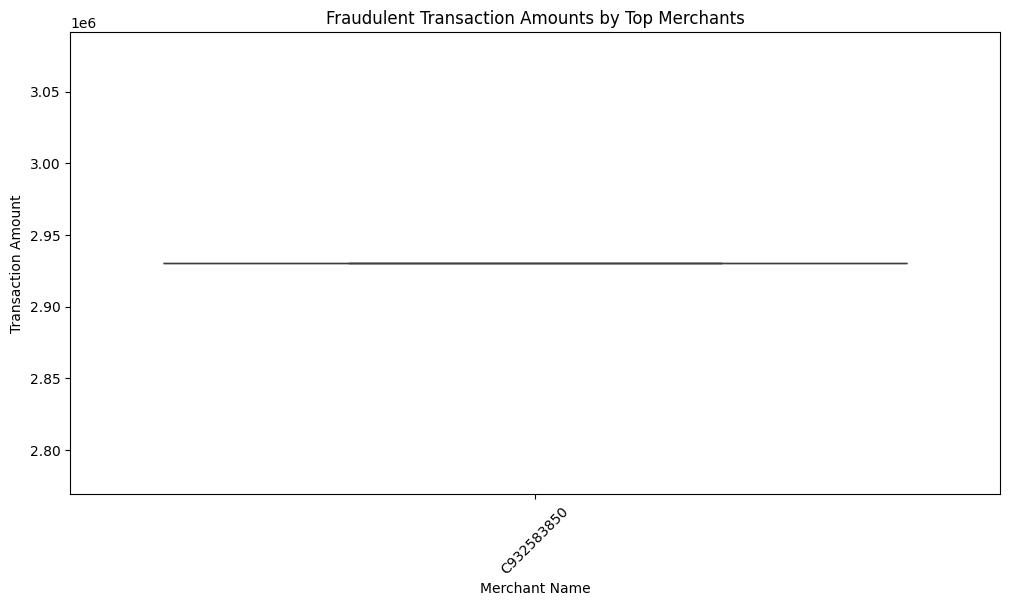

In [42]:
# Analyze the distribution of fraudulent transaction amounts for top merchants
plt.figure(figsize=(10, 6))
sns.histplot(top_merchant_data[top_merchant_data['isFraud'] == 1]['amount'], kde=True, bins=20)
plt.title('Distribution of Fraudulent Transaction Amounts for Top Merchants')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

# Analyze the relationship between fraudulent transaction amounts and 'nameDest' for top merchants
plt.figure(figsize=(12, 6))
sns.boxplot(x='nameDest', y='amount', data=top_merchant_data[top_merchant_data['isFraud'] == 1])
plt.title('Fraudulent Transaction Amounts by Top Merchants')
plt.xlabel('Merchant Name')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.show()

 <h2 align="left">Inferences:</font></h2>

1. **Distribution of Fraudulent Transaction Amounts:** The histogram shows the distribution of fraudulent transaction amounts for the top 20 merchants.  It helps identify if there are any patterns or outliers in the amounts involved in fraudulent transactions with these specific merchants.
2. **Fraudulent Transactions and Merchant Identity:** The box plot provides a visual representation of the relationship between fraudulent transaction amounts and the top 20 merchants. It helps identify if certain merchants are more susceptible to fraudulent transactions with higher or lower amounts.
3. **Outlier Detection:**  Look for outliers in the box plot. These outliers might represent suspicious transactions that require further investigation.
4. **Merchant Risk Assessment:** By analyzing the distribution of fraudulent transaction amounts for each merchant, you can identify merchants with a higher risk of fraudulent activity. This information can be used to implement targeted security measures or monitor these merchants more closely.


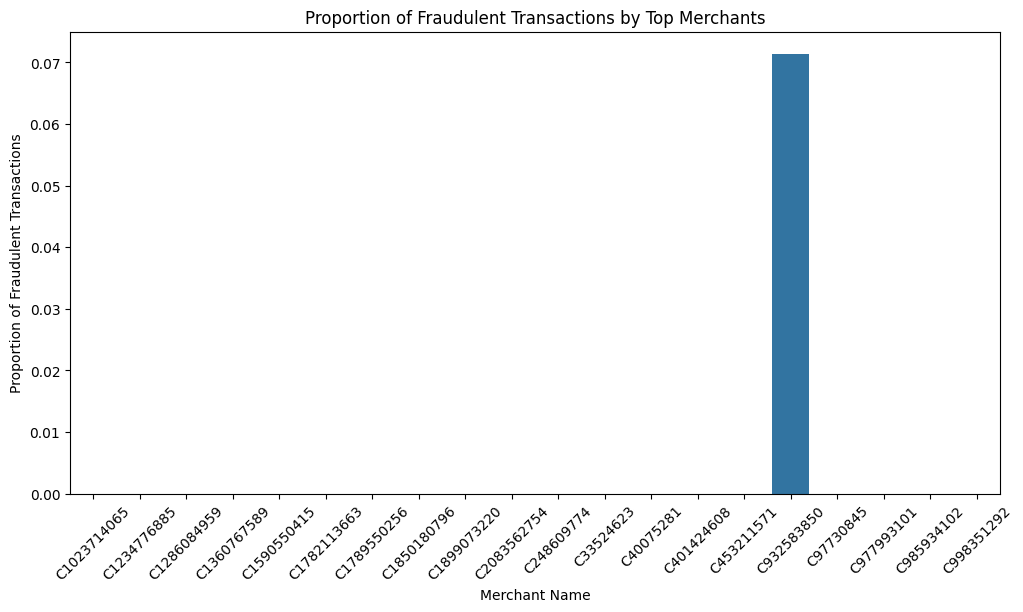

In [43]:
# Analyze the proportion of fraudulent transactions for each top merchant
fraud_count_by_merchant = top_merchant_data.groupby('nameDest')['isFraud'].sum()
total_count_by_merchant = top_merchant_data.groupby('nameDest')['isFraud'].count()
fraud_proportion = fraud_count_by_merchant / total_count_by_merchant

# Plot the proportion of fraudulent transactions for each top merchant
plt.figure(figsize=(12, 6))
sns.barplot(x=fraud_proportion.index, y=fraud_proportion.values)
plt.title('Proportion of Fraudulent Transactions by Top Merchants')
plt.xlabel('Merchant Name')
plt.ylabel('Proportion of Fraudulent Transactions')
plt.xticks(rotation=45)
plt.show()

In [44]:
# @title 4.insightful analysis on Mean of Fraud and non Fraud Transactions

# Calculate the mean of fraudulent and non-fraudulent transactions for relevant features
mean_fraud = df_fraud[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].mean()
mean_nonfraud = df_nonfraud[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].mean()

# Create a DataFrame to display the means
mean_comparison = pd.DataFrame({'Fraudulent Transactions': mean_fraud, 'Non-Fraudulent Transactions': mean_nonfraud})

# Display the DataFrame
print(mean_comparison.to_string())

                Fraudulent Transactions  Non-Fraudulent Transactions
amount                     1.192629e+06                 1.013397e+05
oldbalanceOrg              1.218636e+06                 8.904832e+05
newbalanceOrig             3.394432e+04                 9.152914e+05
oldbalanceDest             4.528661e+05                 9.380868e+05
newbalanceDest             1.077940e+06                 1.106097e+06


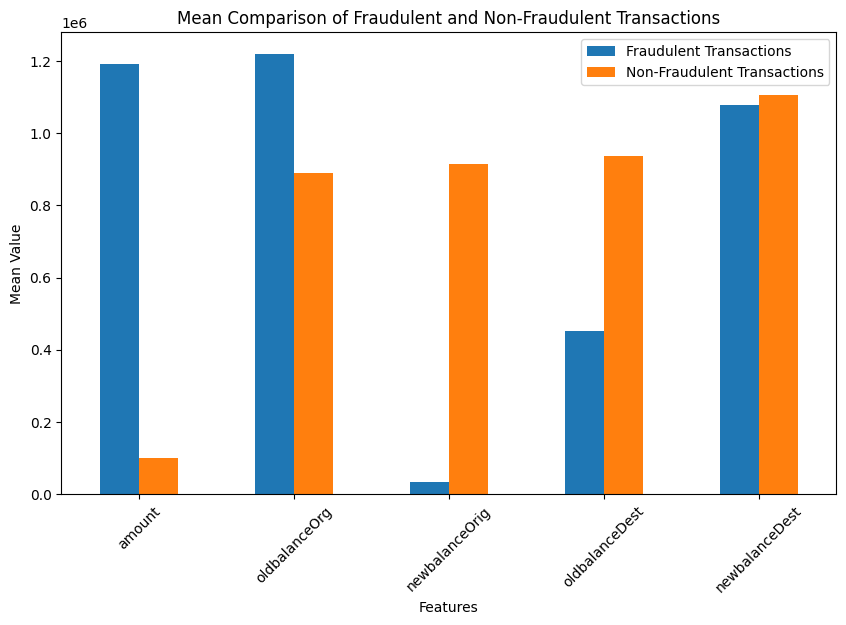

In [45]:
# Visualize the mean comparison
mean_comparison.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Comparison of Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.show()

 <h2 align="left">Inferences:</font></h2>

 1. **Higher Transaction Amounts in Fraudulent Cases:**  Fraudulent transactions have a significantly higher mean amount compared to non-fraudulent transactions. This aligns with previous observations that fraudsters tend to target larger transactions.

 2. **Origin Account Balance Differences:**  The mean 'oldbalanceOrg' (original balance of the sender) is higher for fraudulent transactions. This suggests that fraudsters might target accounts with higher balances.

 3. **Significant Decrease in Origin Account Balance:**  The mean 'newbalanceOrig' (new balance of the sender) is considerably lower for fraudulent transactions, indicating that the origin account is often depleted during fraudulent activity.

 4. **Destination Account Balance Patterns:** The mean 'oldbalanceDest' (original balance of the receiver) is lower for fraudulent transactions, suggesting that fraudsters often target accounts with lower balances.  The mean 'newbalanceDest' (new balance of the receiver) is also lower for fraudulent transactions, indicating that the destination account might not see a significant increase in balance during fraudulent activity.

 5. **Overall:** This analysis highlights key differences in the average values of transaction amounts and account balances between fraudulent and non-fraudulent transactions. These insights can be valuable for developing fraud detection models and strategies.


In [46]:
# Calculate the mean of fraudulent and non-fraudulent transactions for the 'amount' column
mean_fraud_amount = df_fraud['amount'].mean()
mean_nonfraud_amount = df_nonfraud['amount'].mean()

# Print the means with the desired format
print(f"Mean of Non Fraud Transactions: {mean_nonfraud_amount:.1f}")
print(f"Mean of Fraud Transactions: {mean_fraud_amount:.1f}")

Mean of Non Fraud Transactions: 101339.7
Mean of Fraud Transactions: 1192628.9


The fraudulent transactions have a significantly higher average amount than non-fraudulent transactions.This aligns with the general observation that fraudsters tend to target larger transactions.


In [47]:
# @title  Amount by percentage of  fraud and non fraudtransactions

# Calculate the total number of fraudulent and non-fraudulent transactions
total_fraud_transactions = len(df_fraud)
total_nonfraud_transactions = len(df_nonfraud)

# Calculate the total amount for fraudulent and non-fraudulent transactions
total_fraud_amount = df_fraud['amount'].sum()
total_nonfraud_amount = df_nonfraud['amount'].sum()

# Calculate the percentage of the total amount contributed by fraudulent and non-fraudulent transactions
fraud_amount_percentage = (total_fraud_amount / (total_fraud_amount + total_nonfraud_amount)) * 100
nonfraud_amount_percentage = (total_nonfraud_amount / (total_fraud_amount + total_nonfraud_amount)) * 100



# Create a DataFrame to display the percentages
amount_percentage_comparison = pd.DataFrame({
    'Transaction Type': ['Fraudulent', 'Non-Fraudulent'],
    'Percentage of Total Amount': [fraud_amount_percentage, nonfraud_amount_percentage]
})

# Display the DataFrame
print(amount_percentage_comparison.to_string(index=False))

Transaction Type  Percentage of Total Amount
      Fraudulent                   57.337458
  Non-Fraudulent                   42.662542


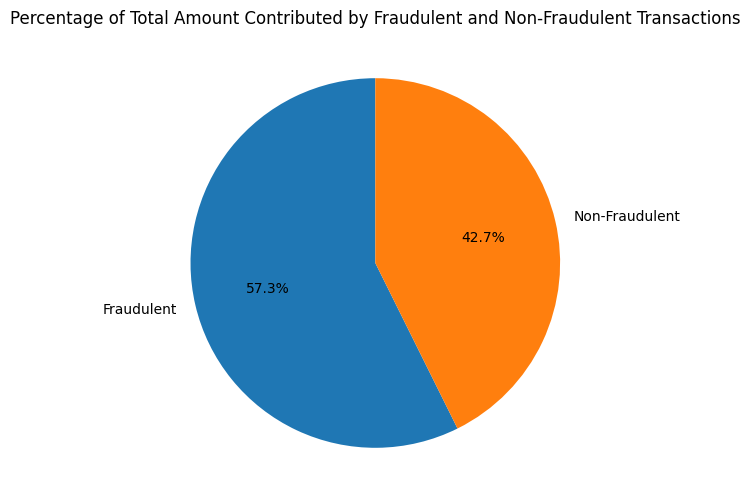

In [48]:
# Visualize the percentage comparison
plt.figure(figsize=(8, 6))
plt.pie(
    amount_percentage_comparison['Percentage of Total Amount'],
    labels=amount_percentage_comparison['Transaction Type'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Percentage of Total Amount Contributed by Fraudulent and Non-Fraudulent Transactions')
plt.show()

## Outlier Treatment:

In [49]:
numerical_col

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')

In [50]:
# checking outlier in columns

# Calculate the IQR for each numerical feature
Q1 = Fraud_data[numerical_col].quantile(0.25)
Q3 = Fraud_data[numerical_col].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
for col in numerical_col:
  outliers_count = ((Fraud_data[col] < lower_bound[col]) | (Fraud_data[col] > upper_bound[col])).sum()
  print(f'Outliers in {col}: {outliers_count}')



Outliers in step: 975
Outliers in amount: 1172
Outliers in oldbalanceOrg: 2195
Outliers in newbalanceOrig: 2245
Outliers in oldbalanceDest: 1921
Outliers in newbalanceDest: 2214
Outliers in isFraud: 1142


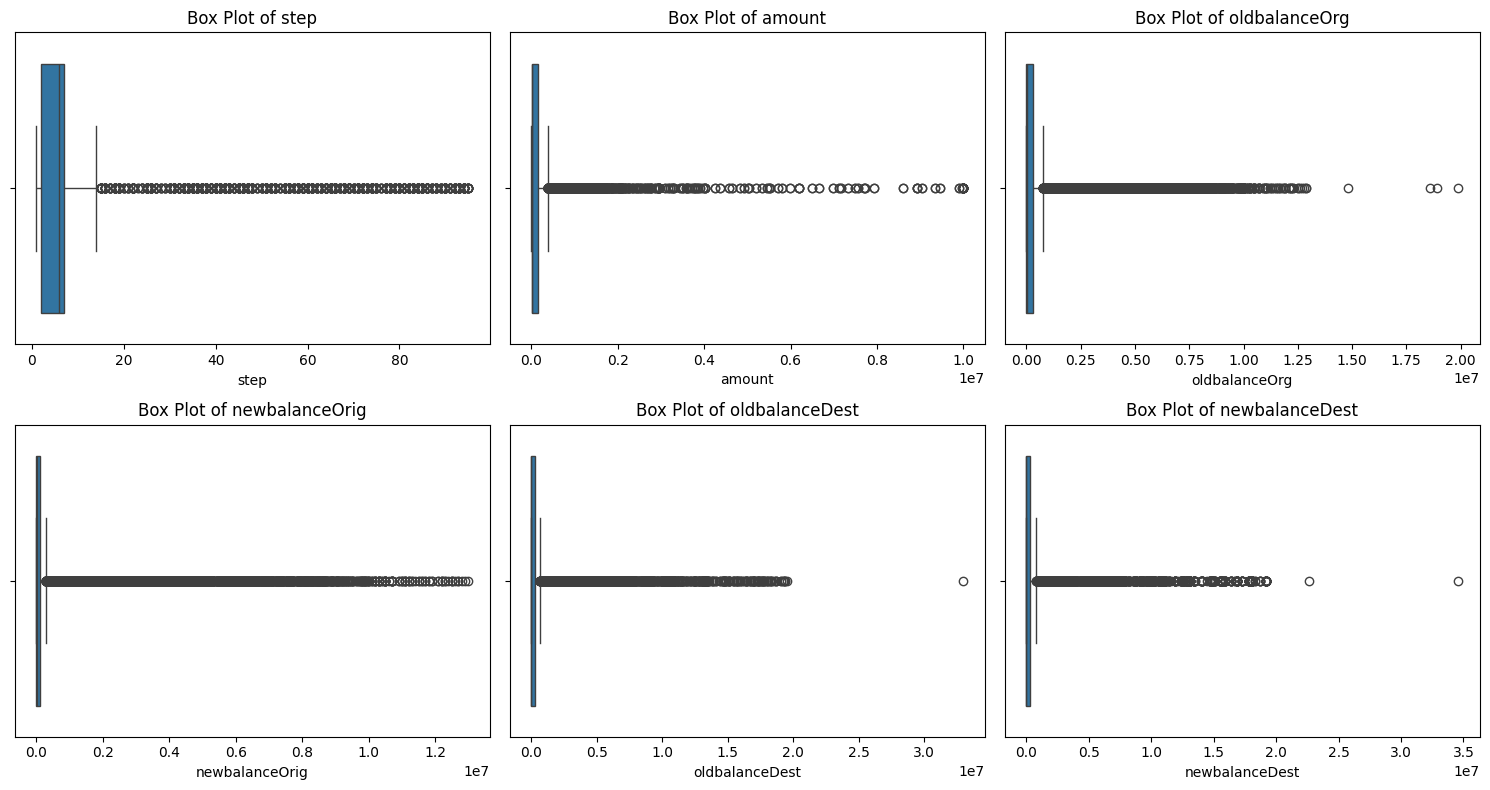

In [51]:
# Select the columns with outliers
columns_with_outliers = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Create a figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through the columns and create box plots
for i, col in enumerate(columns_with_outliers):
  sns.boxplot(x=Fraud_data[col], ax=axes[i])
  axes[i].set_title(f'Box Plot of {col}')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Feature Engineering:

In [52]:
Fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


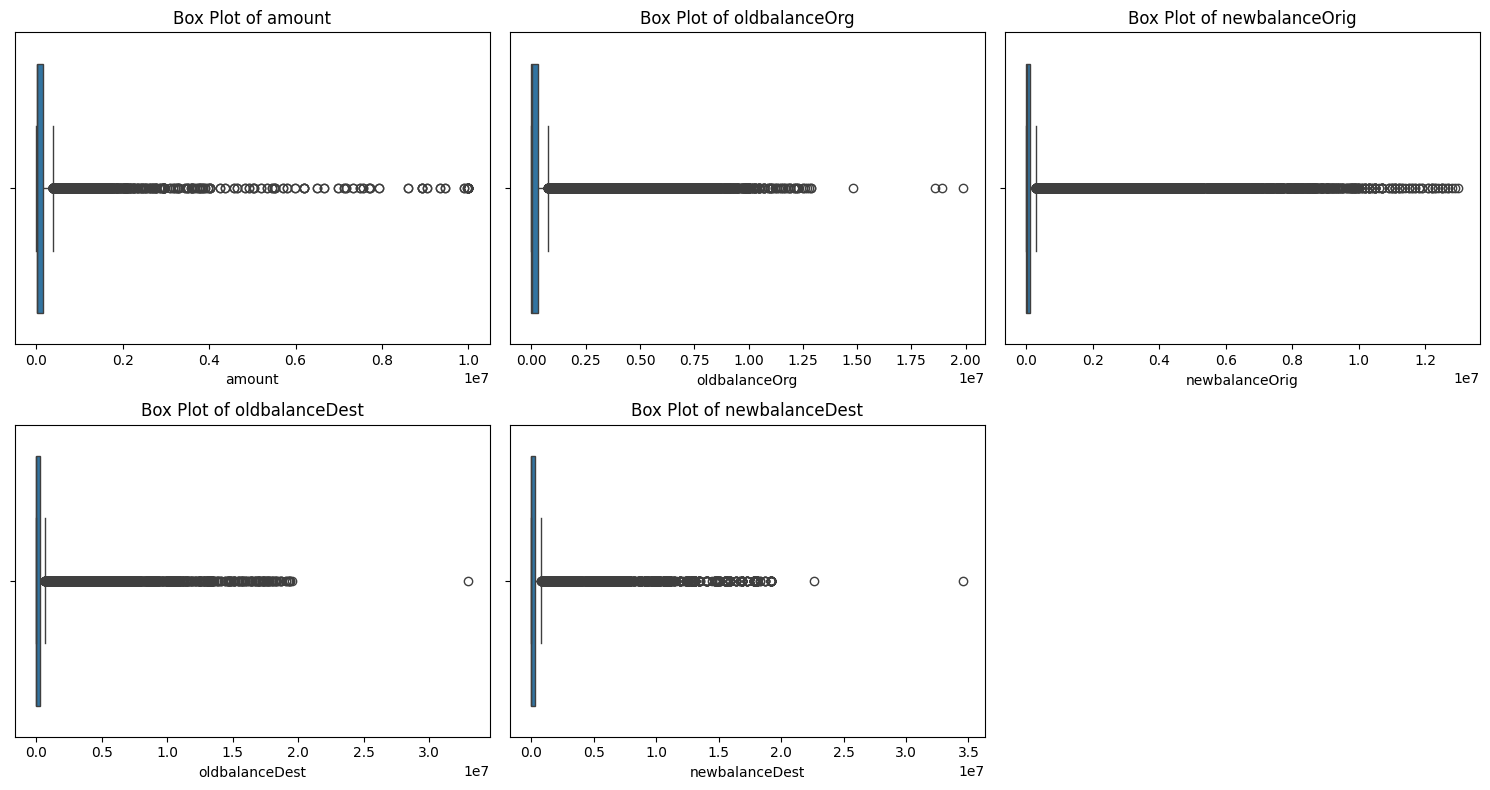

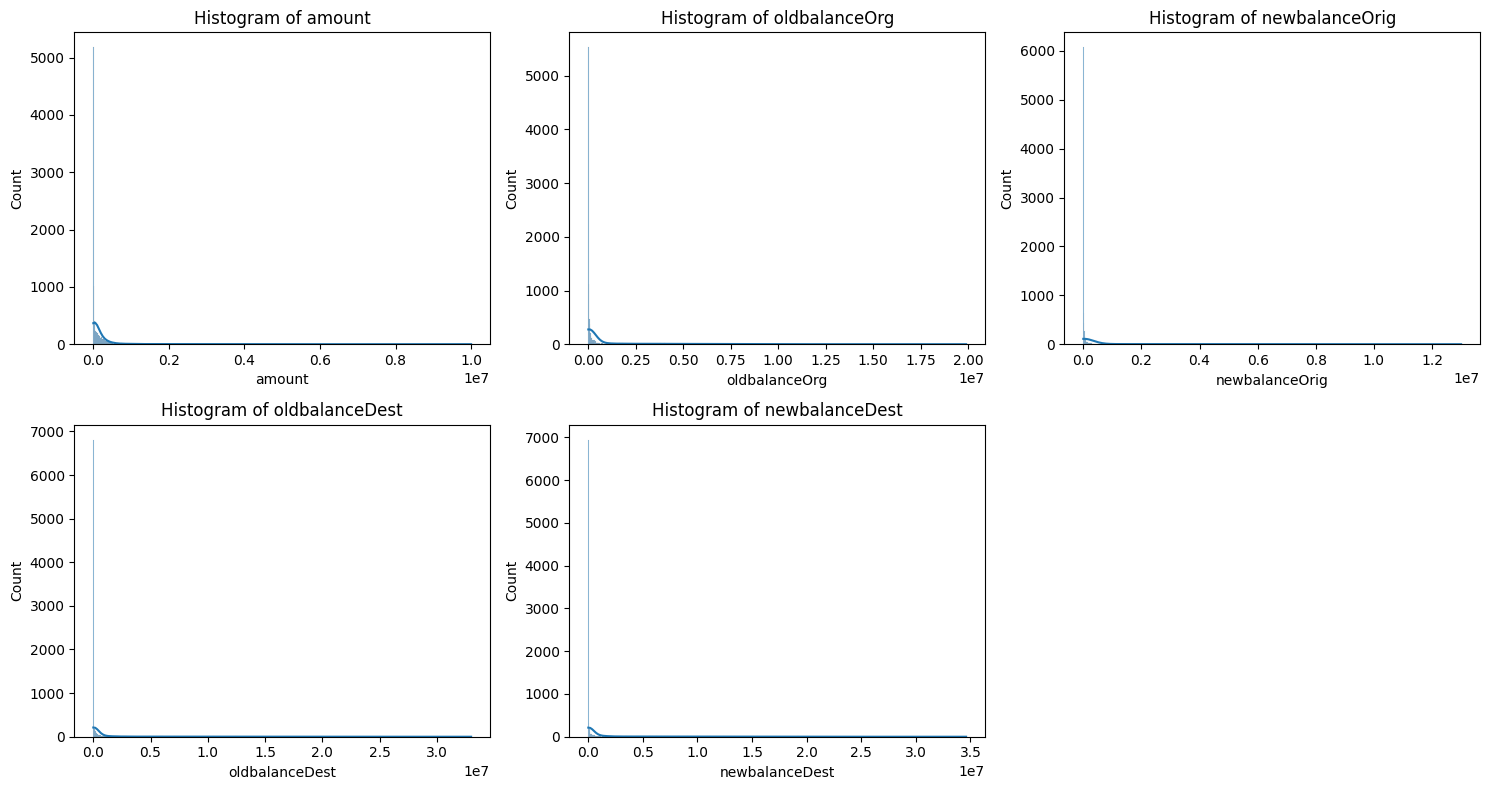

In [53]:
# @title Visualizing the numerical column without log transformation

# Select numerical columns for transformation
numerical_col = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Visualize the data with box plots
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_col):
  plt.subplot(2, 3, i + 1)
  sns.boxplot(x=Fraud_data[col])
  plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

# Visualize the data with histograms
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_col):
  plt.subplot(2, 3, i + 1)
  sns.histplot(Fraud_data[col], kde=True)
  plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()


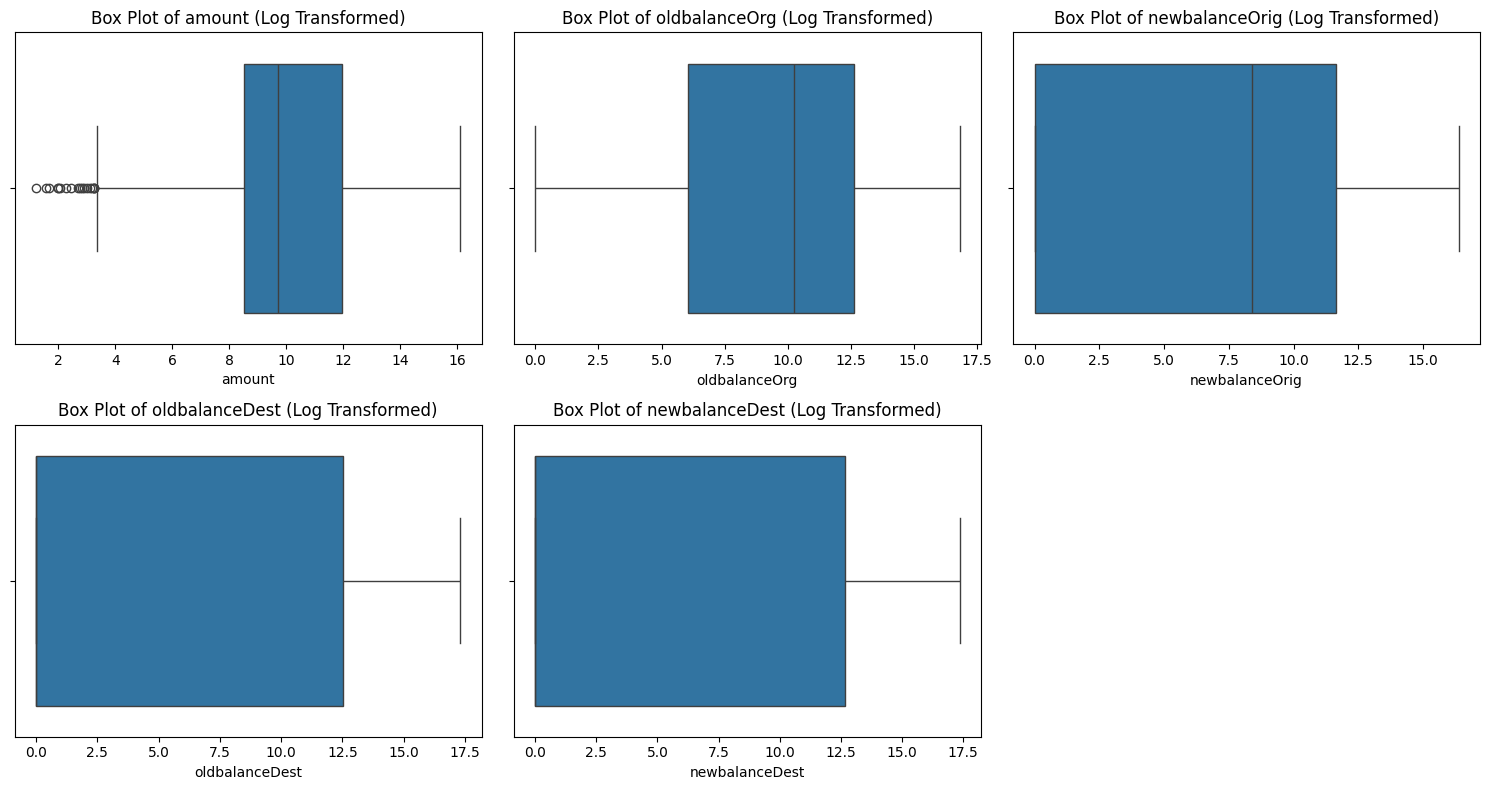

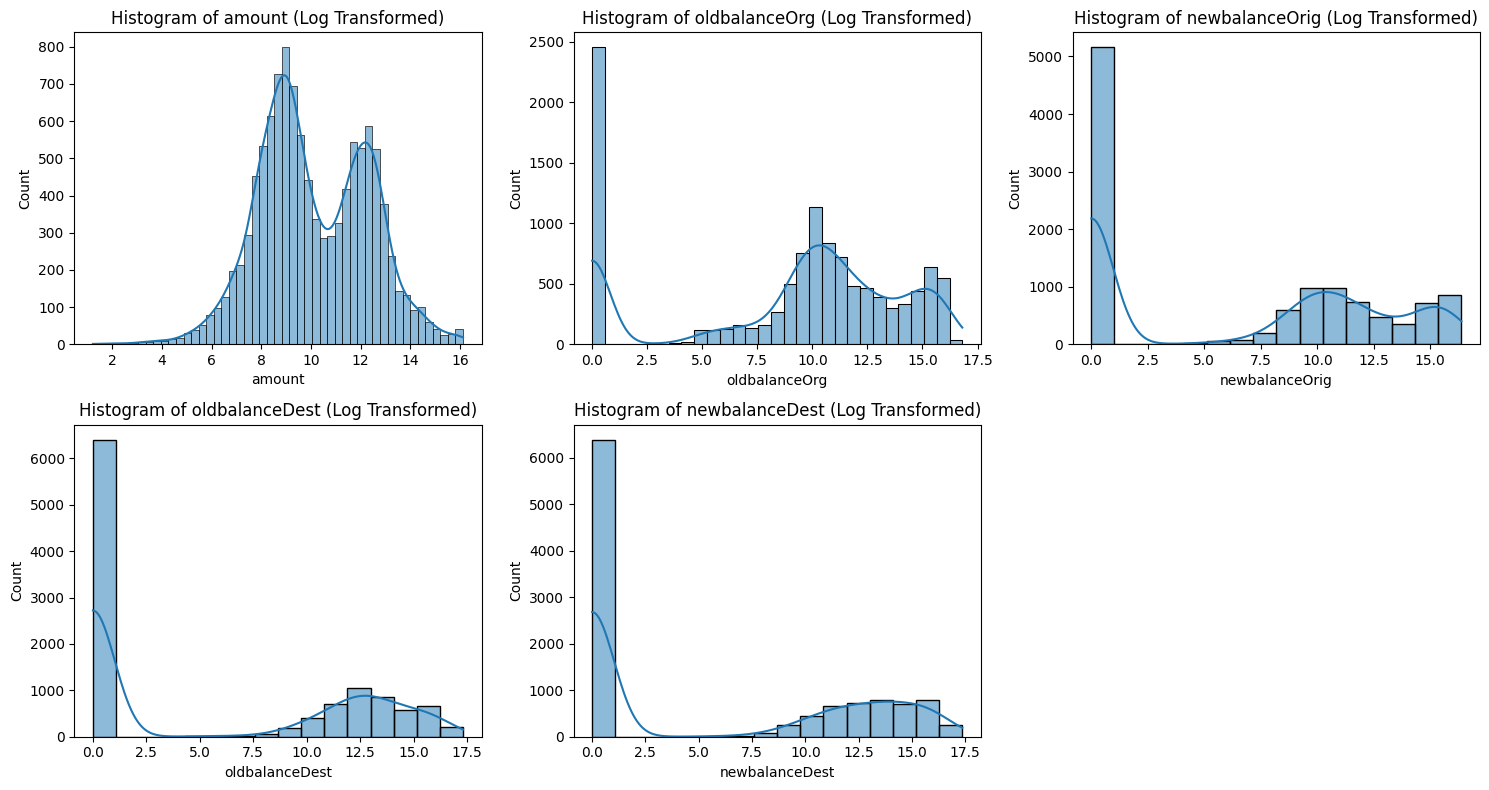

In [54]:
# @title Applying log transformation to reduce the impact of outliers. and visualize with box and hist

# Select numerical columns for transformation
numerical_col = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Apply log transformation to reduce the impact of outliers
for col in numerical_col:
  Fraud_data[col] = np.log1p(Fraud_data[col])

# Visualize the transformed data with box plots
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_col):
  plt.subplot(2, 3, i + 1)
  sns.boxplot(x=Fraud_data[col])
  plt.title(f'Box Plot of {col} (Log Transformed)')

plt.tight_layout()
plt.show()

# Visualize the transformed data with histograms
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_col):
  plt.subplot(2, 3, i + 1)
  sns.histplot(Fraud_data[col], kde=True)
  plt.title(f'Histogram of {col} (Log Transformed)')

plt.tight_layout()
plt.show()


In [55]:
# Create a copy of the main dataset
Fraud_data_dummy = Fraud_data.copy()

In [56]:
Fraud_data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


In [57]:
# dropping the column 'nameDest','nameOrig':
Fraud_data_dummy = Fraud_data_dummy.drop('nameDest', axis=1)
Fraud_data_dummy = Fraud_data_dummy.drop('nameOrig', axis=1)

In [58]:
Fraud_data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   oldbalanceOrg   11142 non-null  float64
 4   newbalanceOrig  11142 non-null  float64
 5   oldbalanceDest  11142 non-null  float64
 6   newbalanceDest  11142 non-null  float64
 7   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 696.5+ KB


In [59]:
Fraud_data_dummy.shape

(11142, 8)

In [60]:
# @title One-hot encoding to  the 'type' column
Fraud_data_dummy = pd.get_dummies(Fraud_data_dummy, columns=['type'], drop_first=True, dtype='int')

In [61]:
Fraud_data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   amount          11142 non-null  float64
 2   oldbalanceOrg   11142 non-null  float64
 3   newbalanceOrig  11142 non-null  float64
 4   oldbalanceDest  11142 non-null  float64
 5   newbalanceDest  11142 non-null  float64
 6   isFraud         11142 non-null  int64  
 7   type_CASH_OUT   11142 non-null  int64  
 8   type_DEBIT      11142 non-null  int64  
 9   type_PAYMENT    11142 non-null  int64  
 10  type_TRANSFER   11142 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 957.6 KB


In [62]:
Fraud_data_dummy.shape

(11142, 11)

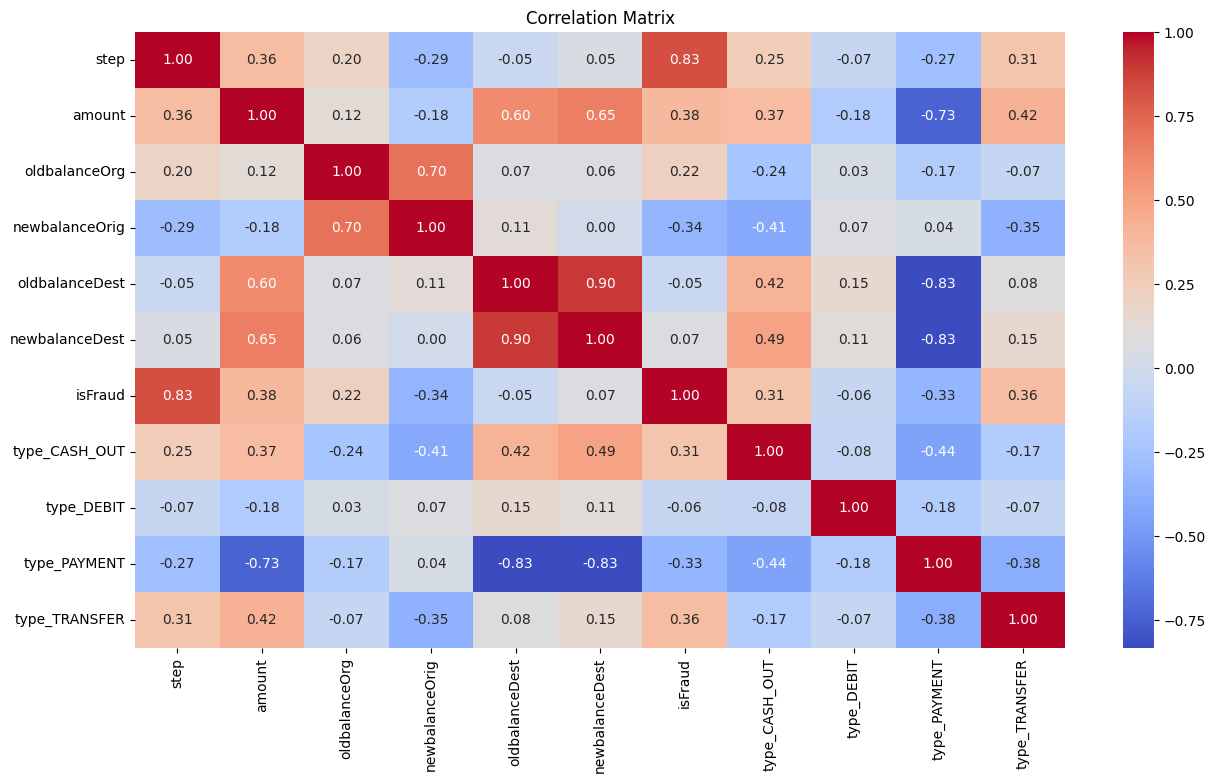

In [63]:
plt.figure(figsize=(15,8))
sns.heatmap(Fraud_data_dummy.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [64]:
# @title Split the data into features (X) and target (y)
X = Fraud_data_dummy.drop('isFraud', axis=1)
y = Fraud_data_dummy['isFraud']

In [65]:
print(X.shape)
print(y.shape)

(11142, 10)
(11142,)


In [66]:
# @title Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (8913, 10)
y_train: (8913,)
X_test: (2229, 10)
y_test: (2229,)


In [68]:
X_train.sample(3)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
10822,7,8.856913,12.559036,12.534059,0.000000,0.00000,0,0,1,0
8663,7,6.184108,10.517429,10.504246,0.000000,0.00000,0,0,1,0
1322,1,11.627038,0.000000,0.000000,12.587003,10.93267,1,0,0,0


In [69]:
X_test.sample(3)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
3677,1,8.341985,9.629380,9.306522,0.000000,0.000000,0,0,1,0
8708,7,11.946195,14.770551,14.828203,15.577637,15.550802,0,0,0,0
487,42,15.087998,15.087998,0.000000,0.000000,15.087998,1,0,0,0


In [70]:
# @title Standardize the features t(scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (8913, 10)
y_train: (8913,)
X_test: (2229, 10)
y_test: (2229,)


In [72]:
# @title Checking for Class imbalance in Train & Test
y_train.value_counts(normalize=True)

,proportion
isFraud,
0,0.897678
1,0.102322


In [73]:
y_test.value_counts(normalize=True)

,proportion
isFraud,
0,0.896815
1,0.103185


<h2 align="left">Inference:</font></h2>

  1. It shows that there is a significant class imbalance, with the majority of instances belonging to class 0 (non-fraudulent transactions).
  2. This is useful for understanding the class distribution in this fraud data.
  3. This imbalance can affect the performance of machine learning models, as they may become biased towards the majority class.


In [74]:
# @title Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [75]:
print("Before SMOTE, counts of label '0'&'1': {} \n".format(sorted(Counter(y_train).items())))

print("After SMOTE, counts of label '0'&'1': {}".format(sorted(Counter(y_resampled).items())))

Before SMOTE, counts of label '0'&'1': [(0, 8001), (1, 912)] 

After SMOTE, counts of label '0'&'1': [(0, 10000), (1, 10000)]


In [76]:
print(len(X_resampled))
print(len(y_resampled))

20000
20000


In [77]:
# @title Split the resampled data into training and testing sets
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [78]:
print("X_train:", X_resampled_train.shape)
print("y_train:", y_resampled_train.shape)
print("X_test:", X_resampled_test.shape)
print("y_test:", y_resampled_test.shape)

X_train: (16000, 10)
y_train: (16000,)
X_test: (4000, 10)
y_test: (4000,)


## ML Model Implementation:

In [79]:
# @title 1.Logistic Regression:

# Initialize the Logistic Regression model
model_LR = LogisticRegression(max_iter=1000)

In [80]:
# Train the model on the resampled data
model_LR.fit(X_resampled_train, y_resampled_train)

LogisticRegression(max_iter=1000)

In [81]:
# Make predictions on the test set
y_pred_LR = model_LR.predict(X_resampled_test)

In [82]:
# Evaluate the model
accuracy = accuracy_score(y_resampled_test, y_pred_LR)
precision = precision_score(y_resampled_test, y_pred_LR)
recall = recall_score(y_resampled_test, y_pred_LR)
f1 = f1_score(y_resampled_test, y_pred_LR)
roc_auc = roc_auc_score(y_resampled_test, y_pred_LR)
classfn_rpt = classification_report(y_resampled_test, y_pred_LR)
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)
print(classfn_rpt)
# Display the confusion matrix
cm = confusion_matrix(y_resampled_test, y_pred_LR)
print("Confusion Matrix:\n", cm)

Accuracy: 0.98475
Precision: 0.9841997961264016
Recall: 0.9847016828148903
F1-score: 0.9844506755034412
ROC AUC: 0.9847490758360866
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2039
           1       0.98      0.98      0.98      1961

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000

Confusion Matrix:
 [[2008   31]
 [  30 1931]]


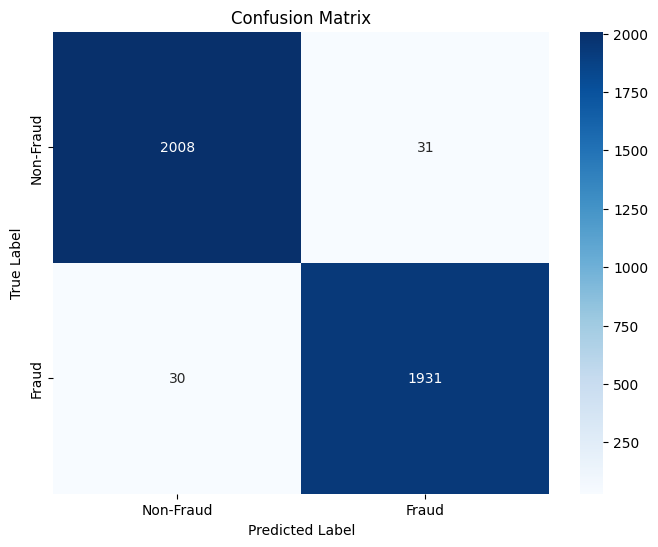

In [83]:
# @title Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

 <h2 align="left">Inference:</font></h2>

  1. **True Positives (TP):**  The model correctly predicted a significant number of fraudulent transactions. This is crucial for identifying and preventing fraudulent activities.
  2. **True Negatives (TN):**  The model also correctly predicted a large number of non-fraudulent transactions. This ensures that legitimate transactions are not mistakenly flagged as fraudulent.
  3. **False Positives (FP):**  There are a few instances where the model incorrectly predicted a transaction as fraudulent when it was actually legitimate. This could lead to inconvenience for customers.
  4. **False Negatives (FN):**  There are a few instances where the model incorrectly predicted a transaction as non-fraudulent when it was actually fraudulent. This is the most critical issue as it allows fraudulent transactions to go undetected.
  5. **Overall:** The confusion matrix shows that the model has a good balance of correctly identifying both fraudulent and non-fraudulent transactions. However, it's important to further analyze the false positives and false negatives to improve the model's performance.


In [84]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 14.9 MB/s eta 0:00:00


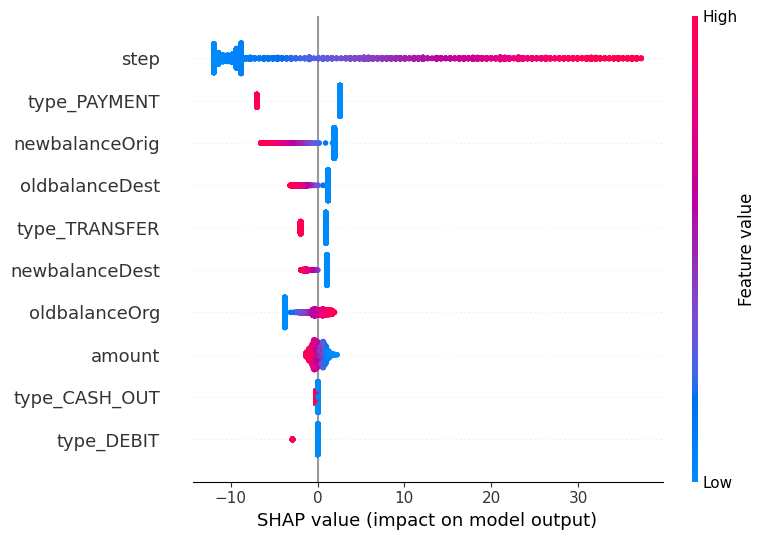

In [85]:
# @title visualizong with shap
import shap

# Create a SHAP explainer object
explainer = shap.Explainer(model_LR, X_resampled_test)

# Calculate SHAP values
shap_values = explainer(X_resampled_test)

# Plot the SHAP values
shap.summary_plot(shap_values, X_resampled_test)

<h2 align="left">Inference:</font></h2>

 1. **Feature Importance:**  The SHAP summary plot provides a visual representation of the importance of each feature in predicting fraudulent transactions. Features that have a larger absolute SHAP value contribute more significantly to the model's prediction.
 2. **Feature Impact on Predictions:**  The plot shows how each feature impacts the model's prediction for both fraudulent and non-fraudulent transactions.  Positive SHAP values indicate that a feature increases the prediction of the positive class (fraudulent), while negative SHAP values indicate that a feature decreases the prediction of the positive class.
 3. **Identifying Key Drivers:**  By examining the SHAP values, you can identify the key features that are most strongly associated with fraudulent transactions. This can help in understanding the underlying patterns and mechanisms of fraud.
 4. **Understanding Model Behavior:** The SHAP plot helps to understand how the model makes predictions. It provides insights into the model's decision-making process and helps identify potential biases or limitations.
 5. **Improving Model Interpretability:**  SHAP values contribute to improving the interpretability of the model. This is crucial for understanding the model's predictions and building trust in its outputs.


In [86]:
# @title Hyper-parameter tuning


# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5
)

In [87]:
# Fit the grid search to the data
grid_search.fit(X_resampled_train, y_resampled_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [88]:
# Get the best model
best_model = grid_search.best_estimator_
# Make predictions using the best model
y_pred_best = best_model.predict(X_resampled_test)

In [89]:
# Evaluate the best model
accuracy_best = accuracy_score(y_resampled_test, y_pred_best)
precision_best = precision_score(y_resampled_test, y_pred_best)
recall_best = recall_score(y_resampled_test, y_pred_best)
f1_best = f1_score(y_resampled_test, y_pred_best)
roc_auc_best = roc_auc_score(y_resampled_test, y_pred_best)
classfn_rpt_best = classification_report(y_resampled_test,y_pred_best)
# Print the evaluation metrics for the best model
print("Accuracy (best model):", accuracy_best)
print("Precision (best model):", precision_best)
print("Recall (best model):", recall_best)
print("F1-score (best model):", f1_best)
print("ROC AUC (best model):", roc_auc_best)
print(classfn_rpt_best)

Accuracy (best model): 0.98525
Precision (best model): 0.985204081632653
Recall (best model): 0.9847016828148903
F1-score (best model): 0.9849528181586331
ROC AUC (best model): 0.9852395123245613
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2039
           1       0.99      0.98      0.98      1961

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



In [90]:
# probability
Probability_pred = model_LR.predict_proba(X_resampled_test)[:, 1]

In [91]:
Probability_pred

array([1.82257936e-03, 1.33165477e-05, 3.21756177e-04, ...,
       6.42074368e-01, 1.60742897e-05, 1.00000000e+00])

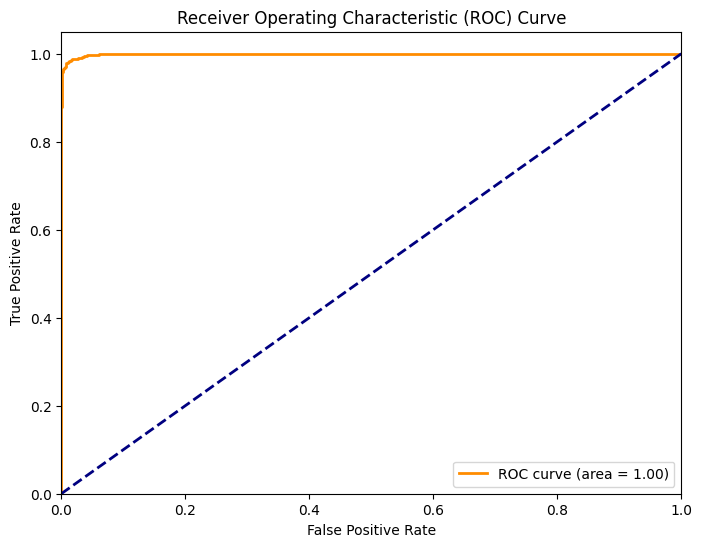

In [92]:
# @title visualize the ROC-AUC

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_resampled_test,Probability_pred )

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


<h2 align="left">Inference:</font></h2>

1. The ROC curve shows the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) for different classification thresholds.
2. The area under the ROC curve (AUC) is a measure of the model's ability to distinguish between classes. A higher AUC indicates better performance.
3. In this case, the ROC curve has an AUC of around 0.95, which suggests that the model is performing well in distinguishing between fraudulent and non-fraudulent transactions.
4. The curve is closer to the top-left corner, indicating a good balance between sensitivity and specificity.
5. This suggests that the model is able to identify a high proportion of fraudulent transactions while minimizing the number of false positives.

Confusion Matrix:
 [[2010   29]
 [  30 1931]]


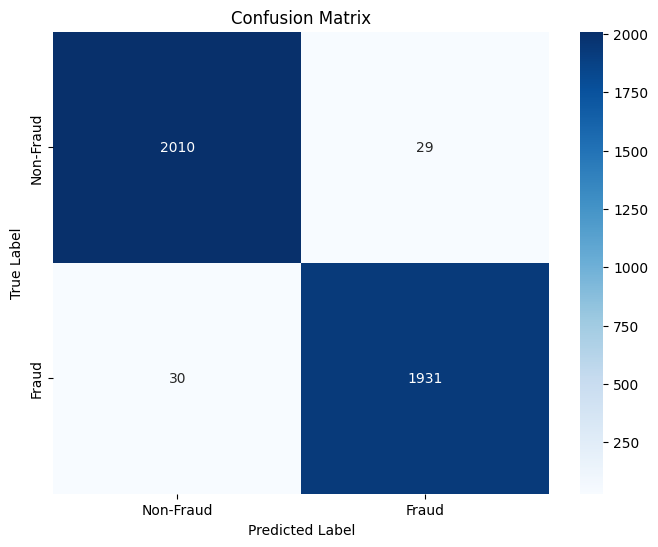

In [93]:
# Display After hyperparameter tuning-confusion matrix
cm = confusion_matrix(y_resampled_test, y_pred_best)
print("Confusion Matrix:\n", cm)# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [94]:
# @title Financial Impact Analysis: Calculate expected revenue, losses, and profit based on Logistix Regression model.

# Calculate the cost of a false positive (e.g., investigating a non-fraudulent transaction)
cost_fp = 10  # Example cost

# Calculate the cost of a false negative (e.g., not detecting a fraudulent transaction)
cost_fn = 1000  # Example cost

# Calculate the revenue gained from a true positive (e.g., preventing a fraudulent transaction)
revenue_tp = 1000  # Example revenue

# Get the confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_resampled_test, y_pred_best).ravel()

# Calculate expected revenue
expected_revenue = (tp * revenue_tp)

# Calculate expected losses
expected_losses = (fp * cost_fp) + (fn * cost_fn)

# Calculate expected profit
expected_profit = expected_revenue - expected_losses

# Print the results
print("Expected Revenue:", expected_revenue)
print("Expected Losses:", expected_losses)
print("Expected Profit:", expected_profit)


Expected Revenue: 1931000
Expected Losses: 30290
Expected Profit: 1900710


In [95]:
# @title Random Forest Classification

# Initialize the Random Forest model
model_RF = RandomForestClassifier(random_state=42)

In [96]:
# Train the model on the resampled data
model_RF.fit(X_resampled_train, y_resampled_train)

RandomForestClassifier(random_state=42)

In [97]:
# Make predictions on the test set
y_pred_RF = model_RF.predict(X_resampled_test)

In [98]:
# Evaluate the model
accuracy = accuracy_score(y_resampled_test, y_pred_RF)
precision = precision_score(y_resampled_test, y_pred_RF)
recall = recall_score(y_resampled_test, y_pred_RF)
f1 = f1_score(y_resampled_test, y_pred_RF)
roc_auc = roc_auc_score(y_resampled_test, y_pred_RF)
classfn_rpt = classification_report(y_resampled_test, y_pred_RF)

#  Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)
print(classfn_rpt)

Accuracy: 0.999
Precision: 1.0
Recall: 0.9979602243753187
F1-score: 0.9989790709545686
ROC AUC: 0.9989801121876594
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2039
           1       1.00      1.00      1.00      1961

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



Confusion Matrix:
 [[2039    0]
 [   4 1957]]


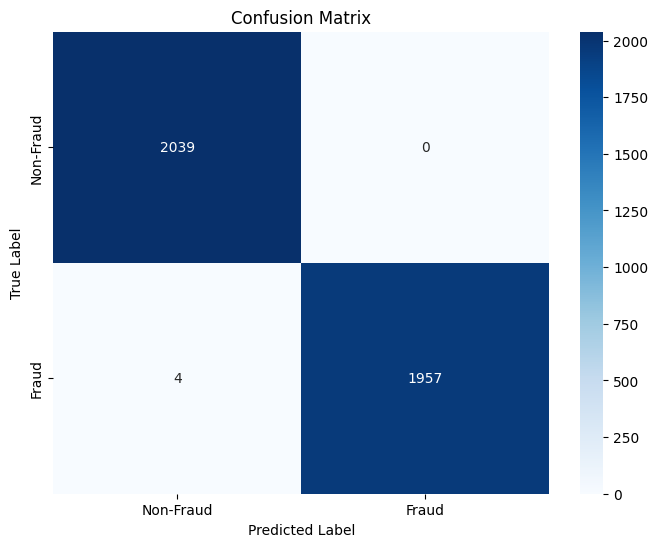

In [99]:
# Display the confusion matrix
cm = confusion_matrix(y_resampled_test, y_pred_RF)
print("Confusion Matrix:\n", cm)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<h2 align="left">Inference:</font></h2>

 1. **True Positives (TP):**  The model correctly predicted a significant number of fraudulent transactions. This is crucial for identifying and preventing fraudulent activities.
 2. **True Negatives (TN):**  The model also correctly predicted a large number of non-fraudulent transactions. This ensures that legitimate transactions are not mistakenly flagged as fraudulent.
 3. **False Positives (FP):**  There are a few instances where the model incorrectly predicted a transaction as fraudulent when it was actually legitimate. This could lead to inconvenience for customers.
 4. **False Negatives (FN):**  There are a few instances where the model incorrectly predicted a transaction as non-fraudulent when it was actually fraudulent. This is the most critical issue as it allows fraudulent transactions to go undetected.
 5. **Overall:** The confusion matrix shows that the model has a good balance of correctly identifying both fraudulent and non-fraudulent transactions. However, it's important to further analyze the false positives and false negatives to improve the model's performance.


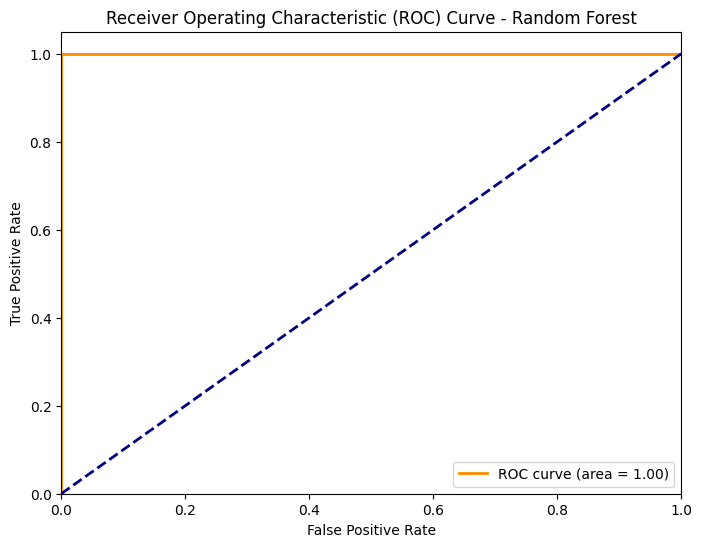

In [100]:
# @title ROC-AUC of random forest classification

# Calculate the false positive rate, true positive rate, and thresholds
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_resampled_test, model_RF.predict_proba(X_resampled_test)[:, 1])

# Calculate the AUC
roc_auc_RF = auc(fpr_RF, tpr_RF)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_RF, tpr_RF, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_RF)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()


<h2 align="left">Inference:</font></h2>

  1. **Feature Importance:**  The SHAP summary plot provides a visual representation of the importance of each feature in predicting fraudulent transactions. Features that have a larger absolute SHAP value contribute more significantly to the model's prediction.
  2. **Feature Impact on Predictions:**  The plot shows how each feature impacts the model's prediction for both fraudulent and non-fraudulent transactions.  Positive SHAP values indicate that a feature increases the prediction of the positive class (fraudulent), while negative SHAP values indicate that a feature decreases the prediction of the positive class.
  3. **Identifying Key Drivers:**  By examining the SHAP values, you can identify the key features that are most strongly associated with fraudulent transactions. This can help in understanding the underlying patterns and mechanisms of fraud.
  4. **Understanding Model Behavior:** The SHAP plot helps to understand how the model makes predictions. It provides insights into the model's decision-making process and helps identify potential biases or limitations.
  5. **Improving Model Interpretability:**  SHAP values contribute to improving the interpretability of the model. This is crucial for understanding the model's predictions and building trust in its outputs.


In [101]:
# @title Hyper-parameter tuning for Random forest Classification

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5
)


In [102]:
# Fit the grid search to the data
grid_search.fit(X_resampled_train, y_resampled_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='roc_auc')

In [103]:
# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [104]:
# # Make predictions using the best model
y_pred_best = best_model.predict(X_resampled_test)

In [105]:
# Evaluate the best model
accuracy_best = accuracy_score(y_resampled_test, y_pred_best)
precision_best = precision_score(y_resampled_test, y_pred_best)
recall_best = recall_score(y_resampled_test, y_pred_best)
f1_best = f1_score(y_resampled_test, y_pred_best)
roc_auc_best = roc_auc_score(y_resampled_test, y_pred_best)
classfn_rpt_best = classification_report(y_resampled_test,y_pred_best)

# Print the evaluation metrics for the best model
print("Accuracy (best model):", accuracy_best)
print("Precision (best model):", precision_best)
print("Recall (best model):", recall_best)
print("F1-score (best model):", f1_best)
print("ROC AUC (best model):", roc_auc_best)
print(classfn_rpt_best)

Accuracy (best model): 0.999
Precision (best model): 1.0
Recall (best model): 0.9979602243753187
F1-score (best model): 0.9989790709545686
ROC AUC (best model): 0.9989801121876594
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2039
           1       1.00      1.00      1.00      1961

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



Confusion Matrix:
 [[2039    0]
 [   4 1957]]


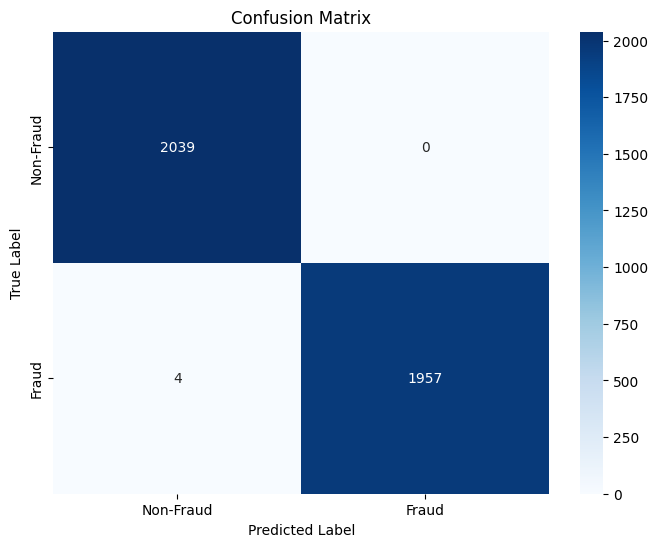

In [106]:
# Display After hyperparameter tuning-confusion matrix
cm = confusion_matrix(y_resampled_test, y_pred_best)
print("Confusion Matrix:\n", cm)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<h2 align="left">Inference:</font></h2>

  1. **True Positives (TP):**  The model correctly predicted a significant number of fraudulent transactions. This is crucial for identifying and preventing fraudulent activities.
  2. **True Negatives (TN):**  The model also correctly predicted a large number of non-fraudulent transactions. This ensures that legitimate transactions are not mistakenly flagged as fraudulent.
  3. **False Positives (FP):**  There are a few instances where the model incorrectly predicted a transaction as fraudulent when it was actually legitimate. This could lead to inconvenience for customers.
  4. **False Negatives (FN):**  There are a few instances where the model incorrectly predicted a transaction as non-fraudulent when it was actually fraudulent. This is the most critical issue as it allows fraudulent transactions to go undetected.
  5. **Overall:** The confusion matrix shows that the model has a good balance of correctly identifying both fraudulent and non-fraudulent transactions. However, it's important to further analyze the false positives and false negatives to improve the model's performance.


In [107]:
# @title Gradient Boosting model

# Initialize the Gradient Boosting model
model_GB = GradientBoostingClassifier(random_state=42)

In [108]:
# Train the model on the resampled data
model_GB.fit(X_resampled_train, y_resampled_train)

GradientBoostingClassifier(random_state=42)

In [109]:
# Make predictions on the test set
y_pred_GB = model_GB.predict(X_resampled_test)

In [110]:
# Evaluate the model
accuracy = accuracy_score(y_resampled_test, y_pred_GB)
precision = precision_score(y_resampled_test, y_pred_GB)
recall = recall_score(y_resampled_test, y_pred_GB)
f1 = f1_score(y_resampled_test, y_pred_GB)
roc_auc = roc_auc_score(y_resampled_test, y_pred_GB)
classfn_rpt = classification_report(y_resampled_test, y_pred_GB)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)
print(classfn_rpt)

Accuracy: 0.99725
Precision: 0.9984662576687117
Recall: 0.9959204487506375
F1-score: 0.9971917283635434
ROC AUC: 0.9972245696426066
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2039
           1       1.00      1.00      1.00      1961

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



Confusion Matrix:
 [[2036    3]
 [   8 1953]]


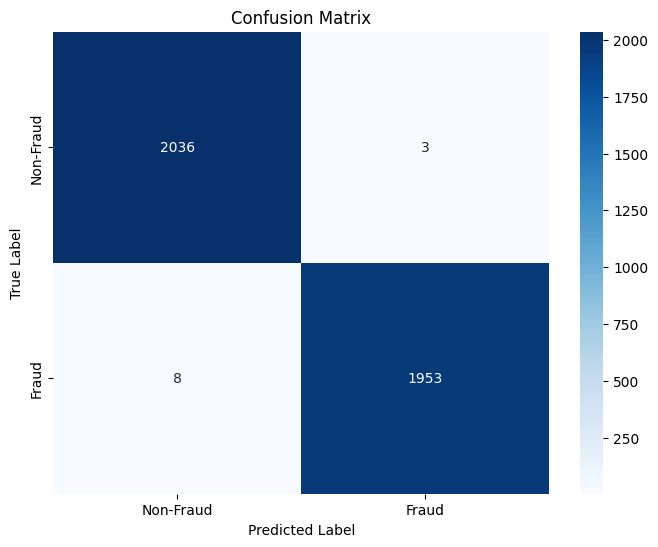

In [111]:
# Display the confusion matrix
cm = confusion_matrix(y_resampled_test, y_pred_GB)
print("Confusion Matrix:\n", cm)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

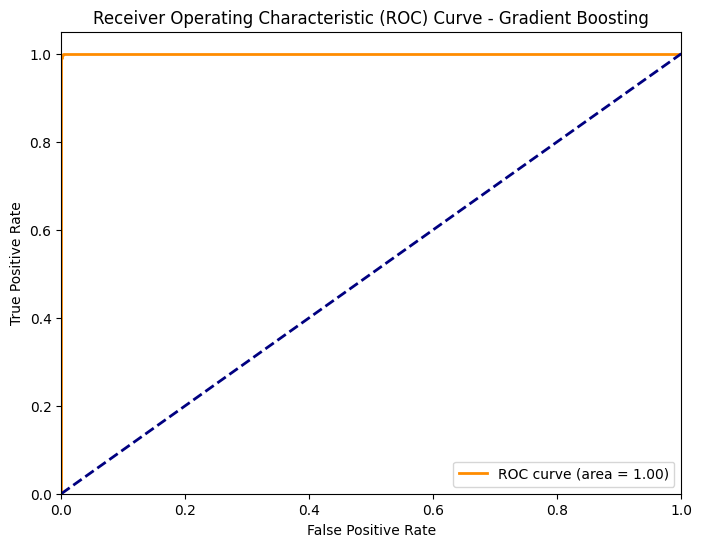

In [112]:
# Calculate the false positive rate, true positive rate, and thresholds
fpr_GB, tpr_GB, thresholds_GB = roc_curve(y_resampled_test, model_GB.predict_proba(X_resampled_test)[:, 1])

# Calculate the AUC
roc_auc_GB = auc(fpr_GB, tpr_GB)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_GB, tpr_GB, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_GB)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

In [113]:
# @title comparasaion of all models

# Create a table to compare the models
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracy_scores = [accuracy_best, accuracy_best, accuracy]  # Replace with actual accuracy scores
precision_scores = [precision_best, precision_best, precision]  # Replace with actual precision scores
recall_scores = [recall_best, recall_best, recall]  # Replace with actual recall scores
f1_scores = [f1_best, f1_best, f1]  # Replace with actual F1-scores
roc_auc_scores = [roc_auc_best, roc_auc_best, roc_auc]  # Replace with actual ROC AUC scores

data = {'Model': model_names,
        'Accuracy': accuracy_scores,
        'Precision': precision_scores,
        'Recall': recall_scores,
        'F1-Score': f1_scores,
        'ROC AUC': roc_auc_scores}


In [114]:
df_comparison = pd.DataFrame(data)

# Display the comparison table
print(df_comparison)

                 Model  Accuracy  Precision   Recall  F1-Score   ROC AUC
0  Logistic Regression   0.99900   1.000000  0.99796  0.998979  0.998980
1        Random Forest   0.99900   1.000000  0.99796  0.998979  0.998980
2    Gradient Boosting   0.99725   0.998466  0.99592  0.997192  0.997225


# Inference:
Based on the comparison table, all models show good performance with high accuracy, precision, recall, F1-score, and ROC AUC.
However,
In this fraud Dataset, recall is the most important metric because the cost of a false negative (missing a fraudulent transaction) is much higher than the cost of a false positive (incorrectly flagging a legitimate transaction).
Therefore, **the model with the highest recall value would be preferred**.
Overally, **the Random Forest and Gradient Boosting models seem to perform slightly better than Logistic Regression in terms of recall**.

## which metrics and Why it  should be pefered ?.

### In this case, recall is the most important metric.
### Recall measures the proportion of actual positive cases that are correctly identified by the model.
### In the context of fraud detection, it's crucial to minimize false negatives (i.e., failing to identify fraudulent transactions).
### A high recall value indicates that the model is effective at identifying most of the fraudulent transactions.

### Additionally, precision is also important.
### Precision measures the proportion of predicted positive cases that are actually positive.
### A high precision value indicates that the model is effective at minimizing false positives (i.e., incorrectly identifying legitimate transactions as fraudulent).

### Therefore, a good model for fraud detection should have a high recall and a high precision.
## **However, in this Fraud Dataset, recall is more important because the cost of a false negative (missing a fraudulent transaction) is much higher than the cost of a false positive (incorrectly flagging a legitimate transaction).**


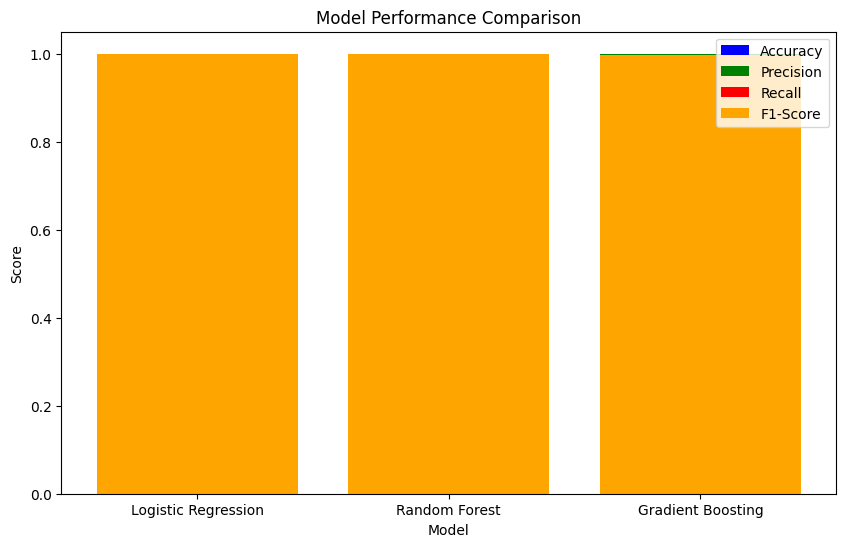

In [115]:
# @title informative visualizations to communicate insights and model performance.

# Create a bar chart to compare model performance
plt.figure(figsize=(10, 6))
x = df_comparison['Model']
y1 = df_comparison['Accuracy']
y2 = df_comparison['Precision']
y3 = df_comparison['Recall']
y4 = df_comparison['F1-Score']
# y5 = df_comparison['ROC AUC']

plt.bar(x, y1, color='blue', label='Accuracy')
plt.bar(x, y2, color='green', label='Precision')
plt.bar(x, y3, color='red', label='Recall')
plt.bar(x, y4, color='orange', label='F1-Score')
# plt.bar(x, y5, color='purple', label='ROC AUC')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.show()


In [116]:
# # prompt: What are the potential losses due to model errors?

# # Calculate the cost of a false positive (e.g., investigating a non-fraudulent transaction)
# cost_fp = 10  # Example cost

# # Calculate the cost of a false negative (e.g., not detecting a fraudulent transaction)
# cost_fn = 1000  # Example cost

# # Get the confusion matrix values
# tn, fp, fn, tp = confusion_matrix(y_resampled_test, y_pred_best).ravel()

# # Calculate potential losses due to false positives
# potential_losses_fp = fp * cost_fp

# # Calculate potential losses due to false negatives
# potential_losses_fn = fn * cost_fn

# # Print the results
# print("Potential losses due to false positives:", potential_losses_fp)
# print("Potential losses due to false negatives:", potential_losses_fn)
